In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from markowitz import Data, Parameters, markowitz
from experiments.utils import synthetic_returns
from experiments.backtest import interest_and_fees, OptimizationInput, create_orders, execute_orders, Timing, BacktestResult, run_markowitz, run_backtest
from taming import turnover_limit_markowitz

from tuning import HyperParameters, get_data_and_parameters, full_markowitz, Limits, Targets

# autoreload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [307]:
steps = 750

prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True).iloc[:]
spread = pd.read_csv("../data/spreads.csv", index_col=0, parse_dates=True).iloc[:]
volumes_shares = pd.read_csv("../data/volumes_shares.csv", index_col=0, parse_dates=True).iloc[:]
volume = volumes_shares * prices
# volume = pd.read_csv("../data/volumes.csv", index_col=0, parse_dates=True).iloc[:] #* prices
rf = pd.read_csv("../data/rf.csv", index_col=0, parse_dates=True).iloc[:, 0].iloc[:]
# returns = prices.pct_change().dropna()


train_len = 500
test_len = 500

# -500 since first 500 re discarded in backtest
prices_train = prices.iloc[-train_len-test_len-500:-test_len]
prices_test = prices.iloc[-test_len-500:]
spread_train = spread.iloc[-train_len-test_len-500:-test_len]
spread_test = spread.iloc[-test_len-500:]
volume_train = volume.iloc[-train_len-test_len-500:-test_len]
volume_test = volume.iloc[-test_len-500:]
rf_train = rf.iloc[-train_len-test_len-500:-test_len]
rf_test = rf.iloc[-test_len-500:]

prices_train_test = prices.iloc[-train_len-test_len-500:]
spread_train_test = spread.iloc[-train_len-test_len-500:]
volume_train_test = volume.iloc[-train_len-test_len-500:]
rf_train_test = rf.iloc[-train_len-test_len-500:]

returns_train = prices_train.pct_change().dropna()
returns_test = prices_test.pct_change().dropna()

n_assets = prices.shape[1]

In [301]:
volume_old.iloc[:,46]

2000-01-04    511728000.0
2000-01-05    778321600.0
2000-01-06    767984000.0
2000-01-07    460734400.0
2000-01-10    505064000.0
                 ...     
2023-09-20     12675003.0
2023-09-21     16512129.0
2023-09-22     14113249.0
2023-09-25     11064068.0
2023-09-26      5205458.0
Name: T59, Length: 6191, dtype: float64

2000-01-04    3.976127e+08
2000-01-05    6.133174e+08
2000-01-06    5.529485e+08
2000-01-07    3.473937e+08
2000-01-10    3.742524e+08
                  ...     
2023-09-20    2.224336e+09
2023-09-21    2.871955e+09
2023-09-22    2.466855e+09
2023-09-25    1.948161e+09
2023-09-26    9.018456e+08
Name: T59, Length: 6191, dtype: float64

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

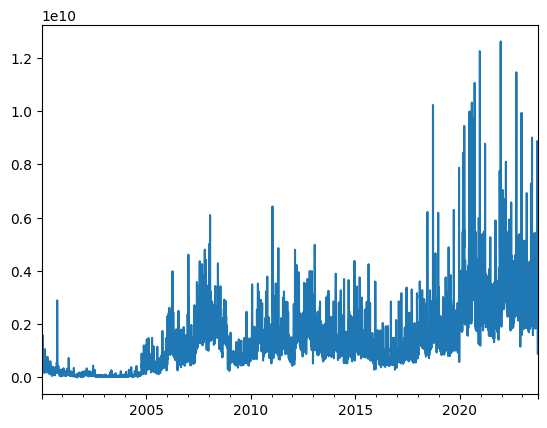

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

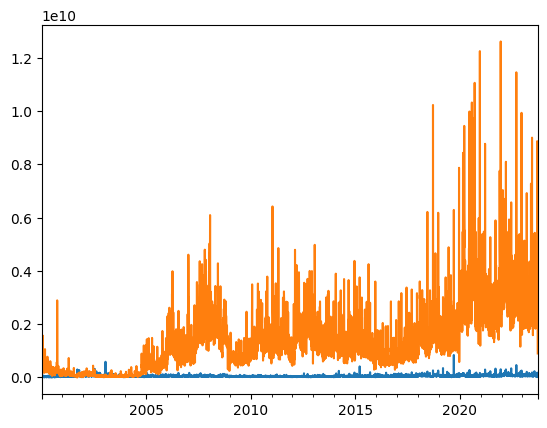

In [309]:
# apple_dollar_volume.plot()


(volume.iloc[:,59]).plot()
(volume_old.iloc[:,46]*prices.iloc[:,46]).plot()

# (volume_old.iloc[:,46]*prices.iloc[:46]).plot()


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

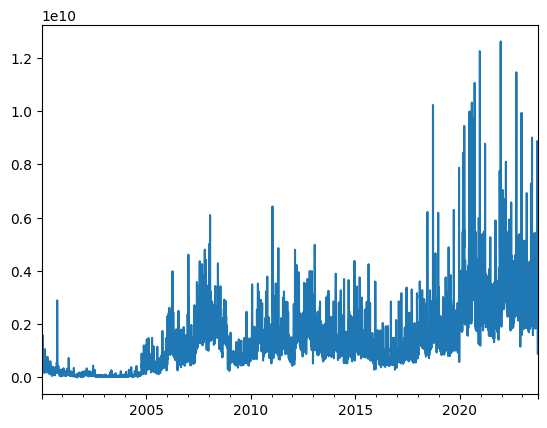

In [310]:
volume.iloc[:,46].plot()

<Axes: >

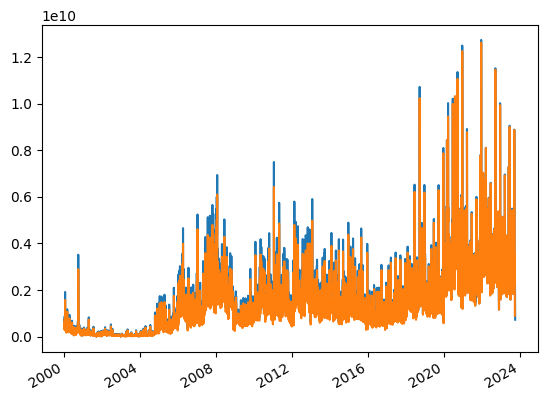

In [305]:
# apple_dollar_volume.plot()


(volume.iloc[:,59]).plot()
(volume_old.iloc[:,46]*prices.iloc[:,46]).plot()

# (volume_old.iloc[:,46]*prices.iloc[:46]).plot()


<Axes: >

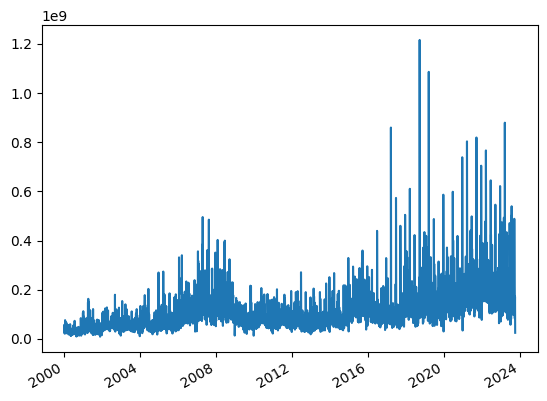

In [260]:
(volume.iloc[:,46]).plot()
# apple_volume.plot()
# apple_volume.plot()

In [262]:
volume.iloc[:,46].dropna()

2000-01-04     46548590.0
2000-01-05     34038620.0
2000-01-06     57721290.0
2000-01-07     32163170.0
2000-01-10     33943310.0
                 ...     
2023-09-26    110420900.0
2023-09-27    171158200.0
2023-09-28    119106800.0
2023-09-29    171789700.0
2023-10-02     25040610.0
Name: UNP UN Equity, Length: 6195, dtype: float64

In [243]:
volume

,AXP UN Equity,VZ UN Equity,MDLZ UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,DIS UN Equity,COP UN Equity,...,HON UW Equity,SPG UN Equity,UPS UN Equity,MDT UN Equity,CVS UN Equity,LMT UN Equity,TMUS UW Equity,COF UN Equity,NKE UN Equity,WFC UN Equity
#NAME?,265826000.0,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
1/4/00,416255600.0,228731500,NaN,127627600,129668500,476601600,137577200,158657300,385702900,23993980,...,NaN,6986137,55663120,157730700,97429180,62051030,NaN,46161580,52703860,245221900
1/5/00,349297000.0,304195100,NaN,278283100,137716500,371390200,212669600,210342200,510082900,64570520,...,NaN,4107869,57272300,182215500,97029230,28106080,NaN,53744420,34785650,129116100
1/6/00,450323200.0,218767700,NaN,190082400,106961000,361588800,171749200,171195700,190825900,42917360,...,NaN,4062513,94248900,208700600,117311200,24919210,NaN,94122560,25697590,136599100
1/7/00,246339200.0,236641200,NaN,235770200,146979800,291331500,163410400,280674800,162318800,28945240,...,NaN,5554357,43943600,414882700,109205500,39162410,NaN,49584430,20293170,130140700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from collections import namedtuple
from dataclasses import dataclass
@dataclass
class HyperParameters:
    gamma_hold: float
    gamma_trade: float
    gamma_turn: float
    gamma_leverage: float
    gamma_risk: float


def get_limits_and_targets(
        T_target,
        L_target,
        risk_target,
        T_max,
        L_max,
        risk_max,
):
    targets = Targets(
        T_target=T_target,
        L_target=L_target,
        risk_target=risk_target,
    )

    limits = Limits(
        T_max=T_max,
        L_max=L_max,
        risk_max=risk_max,
    )

    return targets, limits
        

def tune_parameters(
    strategy,
    train_len,
    prices,
    spread,
    volume,
    rf,
):  
    def run_strategy(targets, limits, hyperparameters):
        results, duals = run_markowitz(
            strategy,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            prices=prices,
            spread=spread,
            volume=volume,
            rf=rf,
            verbose=False,
        )
        return results, duals
    def sharpes(results):
        returns_train = results.portfolio_returns.iloc[:train_len]
        returns_test = results.portfolio_returns.iloc[train_len:]
        sharpe_train = np.sqrt(252)*returns_train.mean()/returns_train.std()
        sharpe_test = np.sqrt(252)*returns_test.mean()/returns_test.std()

        return sharpe_train, sharpe_test

    # Set initial hyperparameters
    # gamma_zeros = pd.Series(np.zeros(len(prices)), index=prices.index)
    # hyperparameter_list = [1,1,0,0,0]
    # hyperparameter_list = [1,1,2.5e-3,5e-4,5e-2]

    # hyperparameters = HyperParameters(
    #     *hyperparameter_list
    # )

    # targets, limits = get_limits_and_targets(
    #     T_target=0,
    #     L_target=0,
    #     risk_target=0,
    #     T_max=50/252,
    #     L_max=1.6,
    #     risk_max=0.1/np.sqrt(252),
    # )

    # Solve hard problem once
    # results, duals = run_strategy(targets, limits, hyperparameters)
    parameters_to_results = {}
    # parameters_to_results["hard"] = (hyperparameters, results)
    # print(f"Hard Sharpe: {results.sharpe}")
    
    # # Set priorities
    # gamma_turns = max(2e-3, duals.Turnover.quantile(0.5))
    # gamma_leverages = max(5e-4, duals.Leverage.quantile(0.8))
    # gamma_risks = max(5e-2, duals.Risk.quantile(0.5))

    gamma_turns = 2.5e-3
    gamma_leverages = 5e-4
    gamma_risks = 5e-2
    hyperparameter_list = [1,1,gamma_turns,gamma_leverages,gamma_risks]
    hyperparameters = HyperParameters(
        *hyperparameter_list
    )

    # Set soft targets and limits
    targets, limits = get_limits_and_targets(
        T_target=50/252,
        L_target=1.6,
        risk_target=0.1/np.sqrt(252),
        T_max=1,
        L_max=3,
        risk_max=0.3/np.sqrt(252),
    )

    # Initial soft solve
    results, _ = run_strategy(targets, limits, hyperparameters)
    parameters_to_results[0] = (hyperparameters, results)
    print(f"SR first soft: {results.sharpe}")

    
    sharpe_train, sharpe_test = sharpes(results)
    print(f"Initial sharpes: {sharpe_train}, {sharpe_test}")
    sharpe_train_old = sharpe_train
    sharpe_test_old = sharpe_test

    best_iteration = 0
    non_inprove_in_a_row = 0

    n_params = 5
    iteration = 1
    while non_inprove_in_a_row < n_params-1: 
        update_var = iteration % n_params-1 # update all or only first two?
        gamma_temp = hyperparameter_list[update_var] * 1.1

        hyperparameter_list_temp = hyperparameter_list.copy()
        hyperparameter_list_temp[update_var] = gamma_temp

        hyperparameters_temp = HyperParameters(
            *hyperparameter_list_temp
        )

        results, _ = run_strategy(targets, limits, hyperparameters_temp)
        sharpe_train, sharpe_test = sharpes(results)

        if sharpe_train > sharpe_train_old:
            hyperparameter_list = hyperparameter_list_temp.copy()
            hyperparameters = hyperparameters_temp
            best_iteration = iteration
            sharpe_train_old = sharpe_train
            sharpe_test_old = sharpe_test
            non_inprove_in_a_row = 0
        else:
            gamma_temp = hyperparameter_list[update_var] * 0.9
            hyperparameter_list_temp[update_var] = gamma_temp
            hyperparameters_temp = HyperParameters(
                *hyperparameter_list_temp
            )
            results, _ = run_strategy(targets, limits, hyperparameters_temp)
            sharpe_train, sharpe_test = sharpes(results)

            if sharpe_train > sharpe_train_old:
                hyperparameter_list = hyperparameter_list_temp.copy()
                hyperparameters = hyperparameters_temp
                sharpe_train_old = sharpe_train
                sharpe_test_old = sharpe_test
                best_iteration = iteration
                non_inprove_in_a_row = 0

            else:
                non_inprove_in_a_row += 1
                print("In a row: " + str(non_inprove_in_a_row))
            
                        
        parameters_to_results[iteration] = (hyperparameters, results)

        print(f"\nIteration number {iteration}; current sharpes: {sharpe_train_old, sharpe_test_old}")
        print(f"Hyperparameters: {hyperparameters}")
        iteration += 1

    
    return parameters_to_results, best_iteration

In [343]:
def run_strategy(targets, limits, hyperparameters):
        results, duals = run_markowitz(
            full_markowitz,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            prices=prices_train_test,
            spread=spread_train_test,
            volume=volume_train_test,
            rf=rf_train_test,
            verbose=False,
        )
        return results, duals

targets, limits = get_limits_and_targets(
        T_target=0,
        L_target=0,
        risk_target=0,
        T_max=10/252,
        L_max=1.6,
        risk_max=0.1/np.sqrt(252),
    )

In [361]:
np.cos(np.arccos(0.9) + np.arccos(0.8))

0.45846606338755974

In [362]:
np.cos(np.arccos(0.9) - np.arccos(0.8))

0.9815339366124404

In [356]:
np.sqrt(201)-1/2

13.677446878757825

In [350]:
results, duals = run_strategy(targets, limits, HyperParameters(1,1,0,0,0))

2 8.095398620908455
1000000.0
2 10.461071842785932
1000032.353760955
2 12.536338924381468
999766.9445755546
2 12.092611189411402
997636.9086789226
2 8.441010453642303
996388.3612558403
2 12.120932514649025
996782.1270570139
2 17.183229447554638
997641.9445518712
2 15.244812641749856
1001892.9159854064
2 7.893812093639131
1001524.340649999
2 6.609011341369972
1000055.8349571058
2 22.590527400167925
1000849.8088224479
2 13.152200817128731
1002653.7171913539
2 5.667269459669276
1002299.9263122664
2 8.883762111323014
1001624.0612894647
2 5.761416210316202
1001339.29021074
2 17.630467545927083
1002717.7613176673
2 6.558119880867395
1004632.3986792952
2 3.2352844715895515
1003159.9003915826
2 10.007802746300332
1005584.6253842458
2 10.163649713353372
1003786.2285284617
2 15.263286826167452
1003792.982846409
2 17.943066162589524
1003292.4767686779
2 16.77346017039201
1003688.0827483409
2 22.735675364330653
1001267.1517453715
2 6.645955765080026
1002229.2574172246
2 8.143395701348553
1002238.6

KeyboardInterrupt: 

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

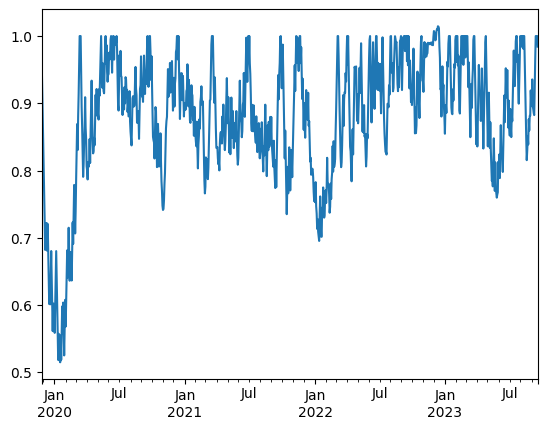

In [110]:
results.cash_weight.plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

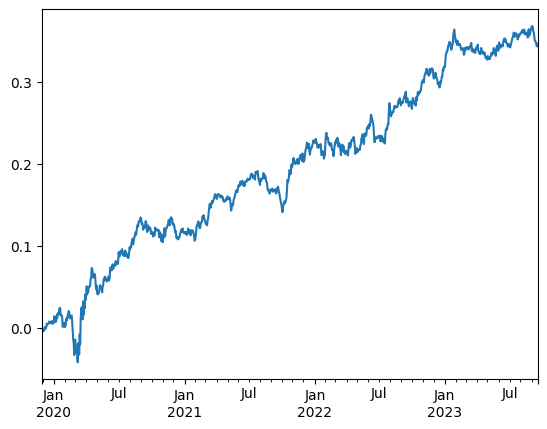

In [115]:
r = results.portfolio_returns.cumsum().plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

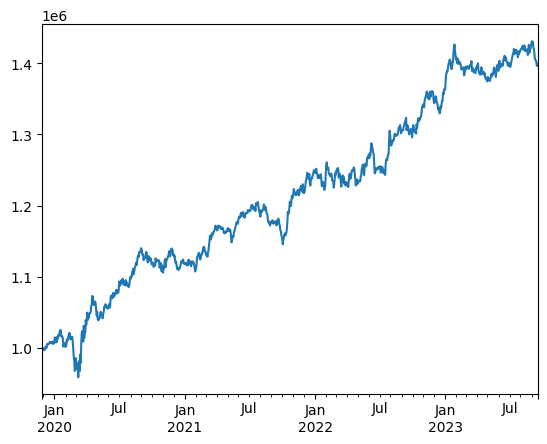

In [116]:
results.portfolio_value.plot()

In [113]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.09541656898577737
volatility: 0.07196272466465899
max drawdown: -0.07562051868976705
max leverage: 1.6119208344601819
sharpe: 1.172174976368122
turnover: 10.085948518834861


In [117]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.09083639436865185
volatility: 0.07148638222329697
max drawdown: -0.06479205684122813
max leverage: 1.6005918989571868
sharpe: 1.1159746549865894
turnover: 10.348026786585793


In [5]:
0.0025* 0.9

0.0022500000000000003

In [41]:
73715.82334590206 / 1e6

0.07371582334590206

In [48]:
1e6 / volume.mean().mean()

0.12587710143074804

In [43]:
parameter_dict_new, best_iteration = tune_parameters(
    full_markowitz,
    500,
    prices_train_test,
    spread_train_test,
    volume_train_test,
    rf_train_test,
)

1 12.628973390753066
2 0.06579917040405954
T0      1.294951
T1      0.464545
T3      1.306032
T4      1.324579
T5      0.535963
          ...   
T95     0.508242
T96     4.076508
T98     2.252744
T99     0.826993
T100    0.295885
Name: 2019-11-27 00:00:00, Length: 74, dtype: float64
1 11.698118378523079
2 0.060949252229709705
T0      1.199503
T1      0.430305
T3      1.209767
T4      1.226947
T5      0.496458
          ...   
T95     0.470781
T96     3.776037
T98     2.086699
T99     0.766037
T100    0.274076
Name: 2019-11-28 00:00:00, Length: 74, dtype: float64
1 15.002591280888122
2 0.05656040100999776
T0      1.531985
T1      0.410269
T3      2.309000
T4      1.296169
T5      0.525311
          ...   
T95     1.046643
T96     5.022293
T98     2.317793
T99     0.938925
T100    0.233016
Name: 2019-11-29 00:00:00, Length: 74, dtype: float64
1 7.868055947245237
2 0.03121435255640101
T0      0.651296
T1      0.318640
T3      0.838189
T4      0.955670
T5      0.344682
          ...   
T95

KeyboardInterrupt: 

In [37]:
volume

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2000-01-04,8227200.0,3858700.0,3161100.0,5339000.0,10207050.0,3308600.0,5646200.0,12409500.0,1075800.0,13226800.0,...,3134900.0,6813200.0,327995.0,850000.0,4514600.0,5188600.0,2986300.0,1058200.0,9136000.0,13214800.0
2000-01-05,6965400.0,5087300.0,6545900.0,5620200.0,7882650.0,5001400.0,7401800.0,15636800.0,2948400.0,15660600.0,...,3005200.0,4379200.0,192064.0,874400.0,5094500.0,4976200.0,1334100.0,1266900.0,5845600.0,6973400.0
2000-01-06,9055200.0,3716200.0,4510700.0,4157800.0,7576050.0,3894200.0,6001800.0,5875200.0,1923800.0,17636000.0,...,2204100.0,3953200.0,186723.0,1427800.0,5531000.0,6285000.0,1164900.0,2189200.0,4343200.0,7156600.0
2000-01-07,4919100.0,4037200.0,5300800.0,5469800.0,6038400.0,3627000.0,9391400.0,5168000.0,1274800.0,14673000.0,...,5207900.0,3232800.0,243692.0,658700.0,10132400.0,5913600.0,1812100.0,1108300.0,3425600.0,6660400.0
2000-01-10,3841200.0,3590700.0,1945800.0,2944600.0,4101600.0,1907800.0,7022200.0,25687100.0,1042800.0,7313600.0,...,2472600.0,3846000.0,258773.0,771100.0,6140900.0,7216600.0,999900.0,803600.0,3480800.0,7813000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,681281.0,6305960.0,732563.0,755595.0,1773185.0,1641959.0,2992029.0,2215281.0,1220763.0,3008864.0,...,465091.0,840810.0,518875.0,686019.0,1860641.0,2151629.0,273769.0,418225.0,2343142.0,4154182.0
2023-09-21,883807.0,4296581.0,965852.0,623286.0,2334992.0,1854669.0,4974651.0,2327918.0,1644028.0,3684504.0,...,919109.0,920151.0,772470.0,958598.0,1351718.0,2510397.0,358946.0,519032.0,2108265.0,4720237.0
2023-09-22,704951.0,5466644.0,886807.0,478199.0,2238448.0,1701966.0,4854583.0,2242562.0,1366974.0,3671176.0,...,673699.0,1021993.0,696835.0,823531.0,1466698.0,1643205.0,361059.0,676213.0,2441229.0,4585399.0
2023-09-25,718173.0,3771299.0,775016.0,344951.0,1755892.0,1678724.0,3419625.0,2275050.0,1204134.0,2921540.0,...,420731.0,1010370.0,622492.0,714224.0,1011874.0,1502396.0,197768.0,480208.0,1931116.0,3421796.0


In [ ]:
np.diag

In [6]:
prices.diagonal()

AttributeError: 'DataFrame' object has no attribute 'diagonal'

In [6]:
sharpe_ratios_train = []
sharpe_ratios_test = []
volas_train = []
volas_test = []
leverages_train = []
leverages_test = []
turnovers_train = []
turnovers_test = []

gamma_holds = []
gamma_trades = []
gamma_turns = []
gamma_leverages = []
gamma_risks = []

def sharpes(results):
        returns_train = results.portfolio_returns.iloc[:train_len]
        returns_test = results.portfolio_returns.iloc[train_len:]
        sharpe_train = np.sqrt(252)*returns_train.mean()/returns_train.std()
        sharpe_test = np.sqrt(252)*returns_test.mean()/returns_test.std()

        return sharpe_train, sharpe_test

def volas(results):
        vola_train = np.sqrt(252)*results.portfolio_returns.iloc[:train_len].std()
        vola_test = np.sqrt(252)*results.portfolio_returns.iloc[train_len:].std()
        
        return vola_train, vola_test

def leverages(results):
        leverage_train = results.asset_weights.abs().iloc[:train_len].sum(axis=1).max()
        leverage_test = results.asset_weights.abs().iloc[train_len:].sum(axis=1).max()
        
        return leverage_train, leverage_test

def turnovers(results):
        trades = results.quantities.diff()
        valuation_trades = (trades * prices).dropna()
        relative_trades = valuation_trades.div(results.portfolio_value, axis=0)

        turnover_train = relative_trades.abs().sum(axis=1).iloc[:train_len].mean() * results.periods_per_year
        turnover_test = relative_trades.abs().sum(axis=1).iloc[train_len:].mean() * results.periods_per_year

        return turnover_train, turnover_test


for i in parameter_dict_new.keys():
    sharpe_train, sharpe_test = sharpes(parameter_dict_new[i][1])
    sharpe_ratios_train.append(sharpe_train)
    sharpe_ratios_test.append(sharpe_test)
    
    vola_train, vola_test = volas(parameter_dict_new[i][1])
    volas_train.append(vola_train)
    volas_test.append(vola_test)
    
    leverage_train, leverage_test = leverages(parameter_dict_new[i][1])
    leverages_train.append(leverage_train)
    leverages_test.append(leverage_test)
    
    turnover_train, turnover_test = turnovers(parameter_dict_new[i][1])
    turnovers_train.append(turnover_train)
    turnovers_test.append(turnover_test)
    
    gamma_holds.append(parameter_dict_new[i][0].gamma_hold)
    gamma_trades.append(parameter_dict_new[i][0].gamma_trade)
    gamma_turns.append(parameter_dict_new[i][0].gamma_turn)
    gamma_leverages.append(parameter_dict_new[i][0].gamma_leverage)
    gamma_risks.append(parameter_dict_new[i][0].gamma_risk)

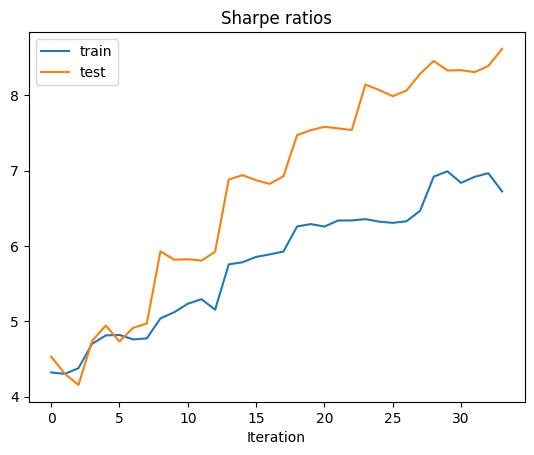

In [7]:
plt.plot(sharpe_ratios_train, label="train")
plt.plot(sharpe_ratios_test, label="test")
plt.title("Sharpe ratios")
plt.xlabel("Iteration")
plt.legend()

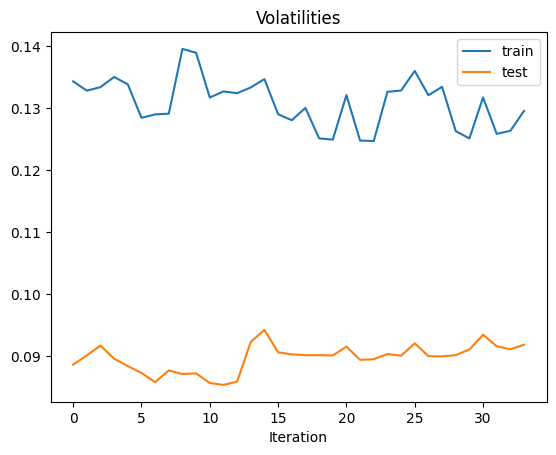

In [8]:
plt.plot(volas_train, label="train")
plt.plot(volas_test, label="test")
plt.title("Volatilities")
plt.xlabel("Iteration")
plt.legend()

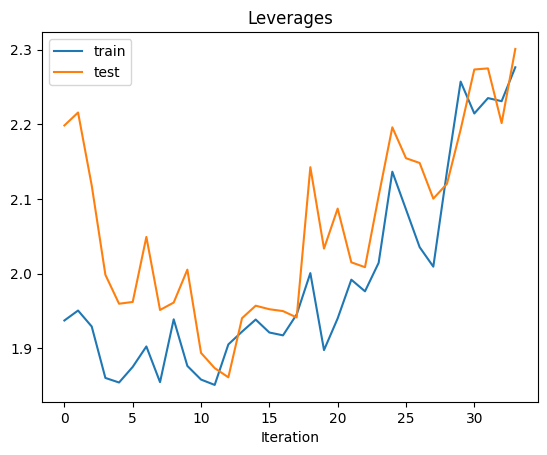

In [9]:
plt.plot(leverages_train, label="train")
plt.plot(leverages_test, label="test")
plt.title("Leverages")
plt.xlabel("Iteration")
plt.legend()

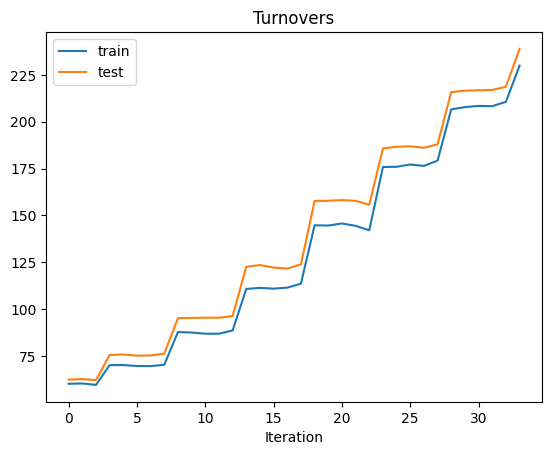

In [10]:
plt.plot(turnovers_train, label="train")
plt.plot(turnovers_test, label="test")
plt.title("Turnovers")
plt.xlabel("Iteration")
plt.legend()

In [16]:
results_tuned = parameter_dict_new[best_iteration][1]
print(f"mean: {results_tuned.mean_return}")
print(f"volatility: {results_tuned.volatility}")
print(f"max drawdown: {results_tuned.max_drawdown}")
print(f"max leverage: {results_tuned.max_leverage}")
print(f"sharpe: {results_tuned.sharpe}")
print(f"turnover: {results_tuned.turnover}")

mean: 0.8465365101690253
volatility: 0.11151843823932293
max drawdown: -0.03143434020184788
max leverage: 2.257261042305931
sharpe: 7.487388323586896
turnover: 212.13402506109483


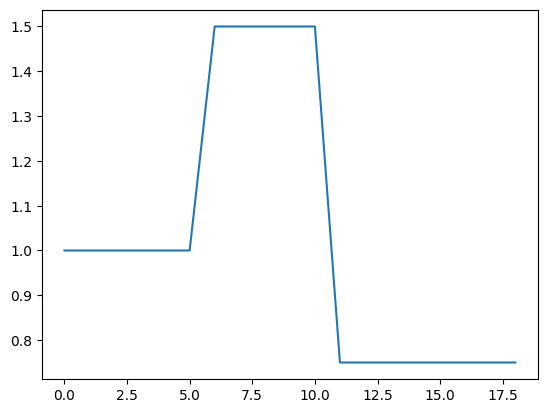

In [100]:
plt.plot(gamma_holds, label="hold")

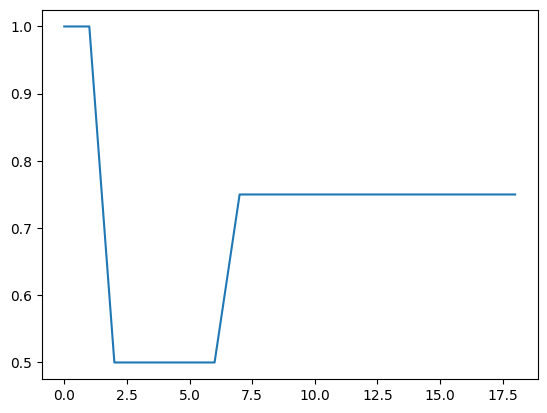

In [101]:
plt.plot(gamma_trades, label="trade")

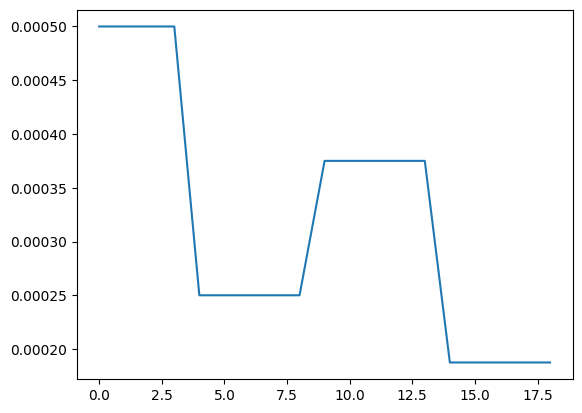

In [102]:
plt.plot(gamma_leverages, label="hold")

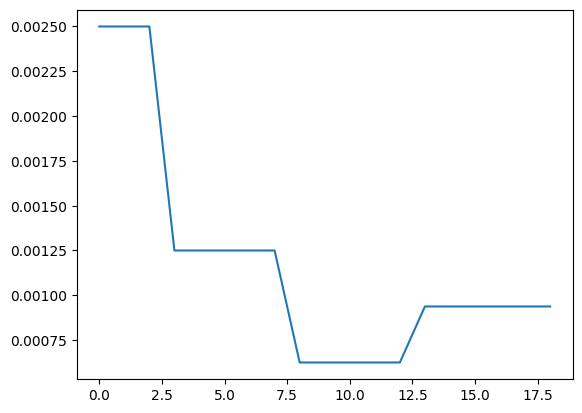

In [103]:
plt.plot(gamma_turns, label="hold")

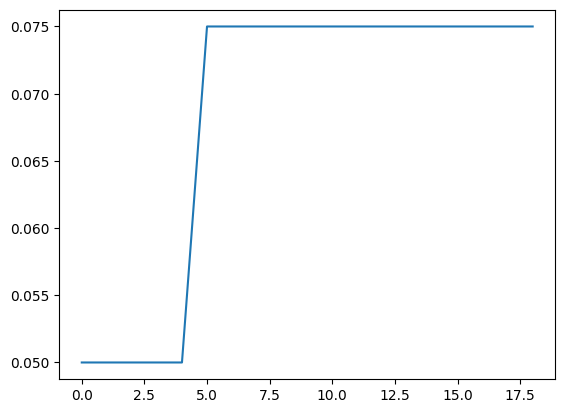

In [104]:
plt.plot(gamma_risks, label="hold")

### Hard

In [119]:
gamma_zeros = pd.Series(np.zeros(len(prices)), index=prices.index)

hyperparameters = HyperParameters(
    1, 1, gamma_zeros, gamma_zeros, gamma_zeros
)

targets = Targets(
    T_target=0,
    L_target=0,
    risk_target=0,
)
limits = Limits(
    T_max=50/252,
    L_max=1.6,
    risk_max=0.1/np.sqrt(252),
)

results_hard, duals_hard = run_markowitz(
            full_markowitz,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            verbose=True,
        ) 

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

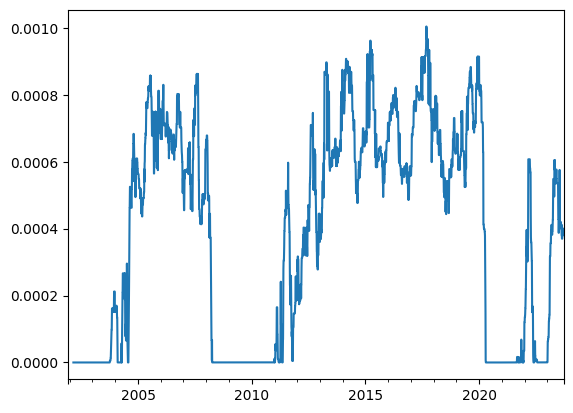

In [120]:
duals_hard.Leverage.rolling(63).quantile(0.8).plot()

In [121]:
duals_hard.Risk.quantile(0.5)

0.036336268015813425

In [122]:
duals_hard.Turnover.quantile(0.5)


0.0024260478795416545

In [123]:
duals_hard.Leverage.quantile(0.8)

0.00044849796152248827

In [124]:
print(f"mean: {results_hard.mean_return}")
print(f"volatility: {results_hard.volatility}")
print(f"max drawdown: {results_hard.max_drawdown}")
print(f"max leverage: {results_hard.max_leverage}")
print(f"sharpe: {results_hard.sharpe}")
print(f"turnover: {results_hard.turnover}")

mean: -0.01687050000850492
volatility: 0.10694406764956797
max drawdown: -0.9399588205979585
max leverage: 1.6270434239500917
sharpe: -0.25531529977814926
turnover: 51.83657590341282


In [56]:
print(f"mean: {results_hard.mean_return}")
print(f"volatility: {results_hard.volatility}")
print(f"max drawdown: {results_hard.max_drawdown}")
print(f"max leverage: {results_hard.max_leverage}")
print(f"sharpe: {results_hard.sharpe}")
print(f"turnover: {results_hard.turnover}")

mean: 0.3776696097661857
volatility: 0.10453363781939191
max drawdown: -0.08151149230255672
max leverage: 1.6034244636184998
sharpe: 3.5126898840553364
turnover: 51.713405869465255


### Fixed priorities

In [32]:
duals_hard.Risk.quantile(0.5)

0.03624073932860246

In [34]:
duals_hard.Leverage.quantile(0.8)


0.0004253814761167239

In [130]:
duals_hard.Turnover.quantile(1)

0.006043415078322465

In [126]:
duals_hard.Risk.quantile(0.5)

0.036336268015813425

In [137]:
gamma_risk = 5e-2
gamma_leverage = 5e-4
gamma_turn = 3e-3


gamma_turns = pd.Series(np.ones(len(prices)), index=prices.index) * gamma_turn
gamma_leverages = pd.Series(np.ones(len(prices)), index=prices.index) * gamma_leverage
gamma_risks = pd.Series(np.ones(len(prices)), index=prices.index) * gamma_risk


hyperparameters = HyperParameters(
    1, 10, gamma_turns, gamma_leverages, gamma_risks
)

targets = Targets(
    T_target=50/252,
    L_target=1.6,
    risk_target=0.1/np.sqrt(252),
)

limits = Limits(
    T_max=1e3,
    L_max=1e3,
    risk_max=1e3,
)

results_soft_fixed, duals_soft_fixed = run_markowitz(
            full_markowitz,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            verbose=True,
        ) 

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

In [136]:
results_soft_fixed.portfolio_returns[1000:].mean() / results_soft_fixed.portfolio_returns[1000:].std() * np.sqrt(252)

0.7866172906558642

In [138]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 0.023572271799699222
volatility: 0.14582031697677175
max drawdown: -0.9406918114665107
max leverage: 2.284854020602341
sharpe: 0.09009986294386688
turnover: 43.84854958286893


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

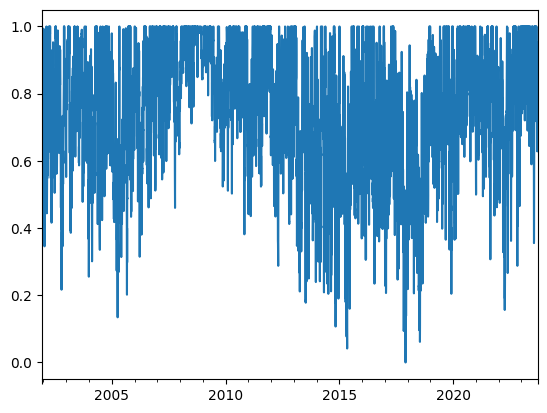

In [139]:
results_soft_fixed.cash_weight.plot()

In [132]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: -0.01846932190234323
volatility: 0.09657335599499763
max drawdown: -0.8220584047815505
max leverage: 1.8228900253622207
sharpe: -0.29925006044542074
turnover: 10.362136274792574


In [129]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: -0.0031142435132695077
volatility: 0.12934738626731182
max drawdown: -0.9379798392972751
max leverage: 2.1268030791867116
sharpe: -0.10472765398826502
turnover: 31.437855723748243


In [70]:
gamma_risk = 0.05
gamma_turn = 0.0025
gamma_leverage = 0.0005

gamma_turns = pd.Series(np.ones(len(prices)), index=prices.index) * gamma_turn
gamma_leverages = (
    pd.Series(np.ones(len(prices)), index=prices.index) * gamma_leverage
)
gamma_risks = pd.Series(np.ones(len(prices)), index=prices.index) * gamma_risk

hyperparameters = HyperParameters(1, 1, gamma_turns, gamma_leverages, gamma_risks)

targets = Targets(
    T_target=50 / 252,
    L_target=1.6,
    risk_target=0.1 / np.sqrt(252),
)
limits = Limits(
    T_max=1e3,
    L_max=1e3,
    risk_max=1e3,
)

results, duals = run_markowitz(
    full_markowitz,
    targets=targets,
    limits=limits,
    hyperparameters=hyperparameters,
    verbose=True,
)

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

In [69]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.44013548152118886
volatility: 0.10083217736721517
max drawdown: -0.052475758616973955
max leverage: 2.18224701854325
sharpe: 4.260724991145439
turnover: 67.01445674865148


In [64]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.5571573399619121
volatility: 0.10717523630289773
max drawdown: -0.06056368630300013
max leverage: 2.524529891306238
sharpe: 5.10011042759034
turnover: 103.82955958906315


In [60]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 1.6824803181255783
volatility: 0.2552101981365625
max drawdown: -0.09327393196229872
max leverage: 5.977830783876957
sharpe: 6.550981607466132
turnover: 434.9780213455417


In [28]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 0.5571573399619121
volatility: 0.10717523630289773
max drawdown: -0.06056368630300013
max leverage: 2.524529891306238
sharpe: 5.10011042759034
turnover: 103.82955958906315


In [27]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 0.5571573399619121
volatility: 0.10717523630289773
max drawdown: -0.06056368630300013
max leverage: 2.524529891306238
sharpe: 5.10011042759034
turnover: 103.82955958906315


In [14]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 0.46558894278731994
volatility: 0.111299584876146
max drawdown: -0.0646629299069752
max leverage: 2.537019975833859
sharpe: 4.089254923871746
turnover: 72.05809021990075


In [15]:
results_soft_fixed.cash_weight.mean()

0.7214265619667974

### Moving priorities

In [24]:
gamma_turns = duals_hard.Turnover.ffill().rolling(100, min_periods=1).quantile(0.5)
gamma_leverages = duals_hard.Leverage.ffill().rolling(100, min_periods=1).quantile(0.8)
gamma_risks = duals_hard.Risk.ffill().rolling(100, min_periods=1).quantile(0.5)

hyperparameters = HyperParameters(
    1, 1, gamma_turns, gamma_leverages, gamma_risks
)

targets = Targets(
    T_target=50/252,
    L_target=1.6,
    risk_target=0.1/np.sqrt(252),
)
limits = Limits(
    T_max=1e3,
    L_max=1e3,
    risk_max=1e3,
)

results_soft_rolling, duals_soft_rolling = run_markowitz(
            full_markowitz,
            prices,
            spread,
            volume,
            rf,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            verbose=True,
        ) 

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

In [77]:
synthetic_returns(prices, 0.15, 5)

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.000496,0.000889,-0.000196,-0.001697,-0.000214,-0.000252,0.001034,0.000906,-0.002095,-0.000724,...,0.000397,-0.001384,-0.001148,0.001473,0.000909,-0.000021,0.000263,-0.000731,0.000264,0.000659
2000-01-06,0.000627,-0.001284,0.001299,-0.000575,-0.001516,-0.000912,0.000049,0.002092,-0.001500,0.000317,...,-0.000016,-0.000709,0.000109,-0.001023,0.000207,-0.000452,-0.000249,0.000314,-0.000227,0.001276
2000-01-07,-0.000278,-0.000395,-0.001053,-0.000641,-0.001814,0.000491,-0.000639,-0.000432,0.000324,0.000403,...,0.000260,-0.000887,-0.001716,-0.000176,-0.000228,0.001155,-0.000017,0.001514,0.000366,0.000620
2000-01-10,-0.000870,0.000426,0.002649,-0.000523,-0.000768,-0.000329,-0.000352,-0.000435,0.000044,-0.000347,...,0.000537,0.001360,-0.000924,0.000128,0.000232,0.001127,0.000499,-0.002068,0.000871,0.001374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,-0.001792,-0.000550,-0.001892,-0.000541,-0.001555,0.002783,0.001396,-0.000915,-0.000134,-0.001108,...,0.000128,0.000821,0.000152,-0.000507,0.000499,-0.000460,0.000440,0.002192,-0.000569,0.001662
2023-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
a = np.random.default_rng(1)

a.normal(1)

1.345584192064786

In [25]:
print(f"mean: {results_hard.mean_return}")
print(f"volatility: {results_hard.volatility}")
print(f"max drawdown: {results_hard.max_drawdown}")
print(f"max leverage: {results_hard.max_leverage}")
print(f"sharpe: {results_hard.sharpe}")
print(f"turnover: {results_hard.turnover}")

mean: 0.3168587894810624
volatility: 0.08018555982341476
max drawdown: -0.06508470082551443
max leverage: 1.600546737716088
sharpe: 3.821154016945492
turnover: 51.76921141241235


In [26]:
print(f"mean: {results_soft_fixed.mean_return}")
print(f"volatility: {results_soft_fixed.volatility}")
print(f"max drawdown: {results_soft_fixed.max_drawdown}")
print(f"max leverage: {results_soft_fixed.max_leverage}")
print(f"sharpe: {results_soft_fixed.sharpe}")
print(f"turnover: {results_soft_fixed.turnover}")

mean: 0.46558894278731994
volatility: 0.111299584876146
max drawdown: -0.0646629299069752
max leverage: 2.537019975833859
sharpe: 4.089254923871746
turnover: 72.05809021990075


In [27]:
print(f"mean: {results_soft_rolling.mean_return}")
print(f"volatility: {results_soft_rolling.volatility}")
print(f"max drawdown: {results_soft_rolling.max_drawdown}")
print(f"max leverage: {results_soft_rolling.max_leverage}")
print(f"sharpe: {results_soft_rolling.sharpe}")
print(f"turnover: {results_soft_rolling.turnover}")

mean: 0.5084854292295689
volatility: 0.1242379585884588
max drawdown: -0.08722662120820734
max leverage: 3.06024481945951
sharpe: 4.008947845127499
turnover: 69.84790188452702


In [19]:
1

1

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

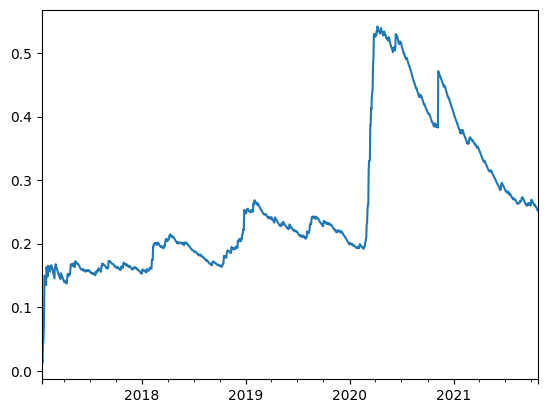

In [54]:
(results.portfolio_returns.ewm(halflife=63).std() * np.sqrt(252)).plot()

In [50]:
results.sharpe

2.9497855621832763

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

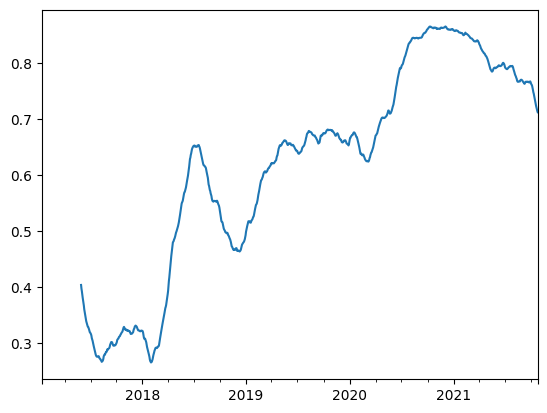

In [19]:
results.cash_weight.rolling(100).mean().plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

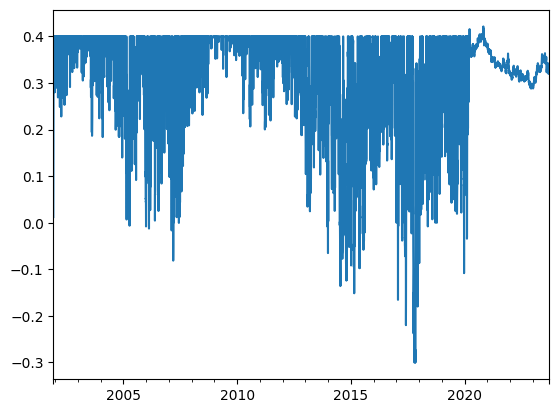

In [149]:
results.cash_weight.plot()

In [145]:
rf*252

2000-01-04    0.03766
2000-01-05    0.03787
2000-01-06    0.03878
2000-01-07    0.03927
2000-01-10    0.04018
               ...   
2023-09-20    0.03731
2023-09-21    0.03731
2023-09-22    0.03731
2023-09-25    0.03731
2023-09-26    0.03731
Name: DFF, Length: 6191, dtype: float64

In [166]:
gamma_zeros = pd.Series(np.zeros(len(prices)), index=prices.index)

hyperparameters = HyperParameters(
    1, 1, gamma_zeros, gamma_zeros, gamma_zeros
)

targets = Targets(
    T_target=0,
    L_target=0,
    risk_target=0,
)
limits = Limits(
    T_max=50/252,
    L_max=1.6,
    risk_max=0.15/np.sqrt(252),
)

results, duals = run_markowitz(
            full_markowitz,
            prices,
            spread,
            volume,
            rf,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            hard=False,
            verbose=True,
        ) 

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1395: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190, 2011-11-22 00:00:00
Day 3200 of 6190, 2012-04-10 00:00:00
Day 3300 of 6190, 2012-08-28 00:00:00
Day 3400 of 61

In [51]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.8635092229646663
volatility: 0.2927362700648457
max drawdown: -0.18559613060231173
max leverage: 6.5980273013555415
sharpe: 2.9497855621832763
turnover: 1135.0950865605707


In [165]:
gamma_risks.mean()

0.02506846771012686

In [155]:
gamma_turn = duals["Turnover"].quantile(0.5)
gamma_leverage = duals["Leverage"].quantile(0.8)
gamma_risk = duals["Risk"].quantile(0.5)

gamma_turns = duals.Turnover.rolling(100, min_periods=1).quantile(0.1).ffill()
gamma_leverages = duals.Leverage.rolling(100, min_periods=1).quantile(0.9).ffill()
gamma_risks = duals.Risk.rolling(100, min_periods=1).quantile(0.5).ffill()

hyperparameters = HyperParameters(
    gamma_hold=1, 
    gamma_trade=1, 
    gamma_turn=gamma_turns, 
    gamma_leverage=gamma_leverages, 
    gamma_risk=gamma_risks,
)

targets = Targets(
    T_target=50/252,
    L_target=1.6,
    risk_target=0.15/np.sqrt(252),
)
limits = Limits(
    T_max=1e6,
    L_max=1e6,
    risk_max=1e6,
)

results2, duals2 = run_markowitz(
            full_markowitz,
            prices,
            spread,
            volume,
            rf,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            hard=False,
            verbose=True,
        )

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1395: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


SolverError
None
Problem status:  None
Day 1400 of 6190, 2005-05-17 00:00:00
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
Day 1500 of 6190, 2005-10-04 00:00:00
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem st

In [156]:
duals.Turnover.isna().sum() / len(duals)

0.16309314586994728

In [140]:
results.cash_weight.max()

0.4213224705984638

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

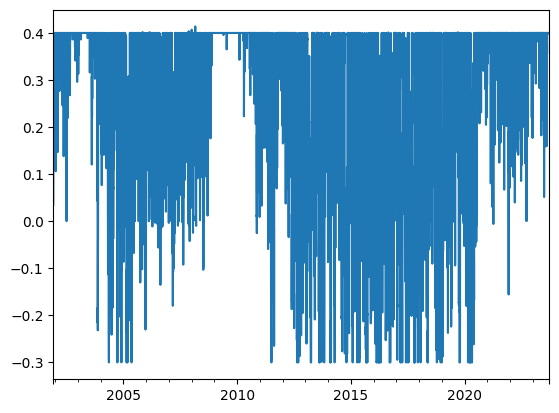

In [158]:
results2.cash_weight.plot()

In [159]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.061805260862413766
volatility: 0.14288361775842023
max drawdown: -0.39194141340553956
max leverage: 3.6950963931884804
sharpe: 0.43255666277229
turnover: 47.605283050731444


In [160]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.061929251794935636
volatility: 0.1730963124332527
max drawdown: -0.4359779910394881
max leverage: 4.8802986164449615
sharpe: 0.35777337439707757
turnover: 110.20969532988059


In [49]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.05925055816284527
volatility: 0.11159393696607192
max drawdown: -0.23411094181749192
max leverage: 1.7226859919667947
sharpe: 0.5309478254258501
turnover: 55.111606334077656


In [36]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.059743591886659314
volatility: 0.11015180164839075
max drawdown: -0.22449478774537934
max leverage: 1.749674175529416
sharpe: 0.5423750768722186
turnover: 55.041133443536665


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

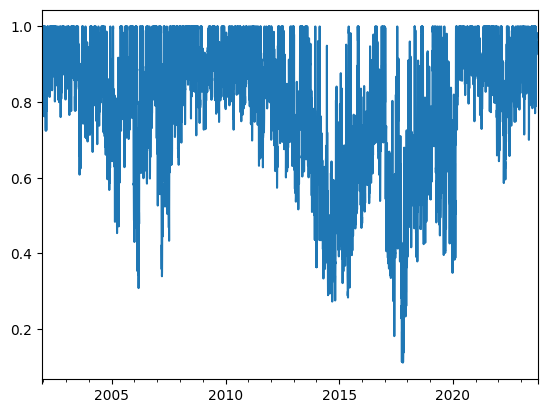

In [52]:
results.cash_weight.plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

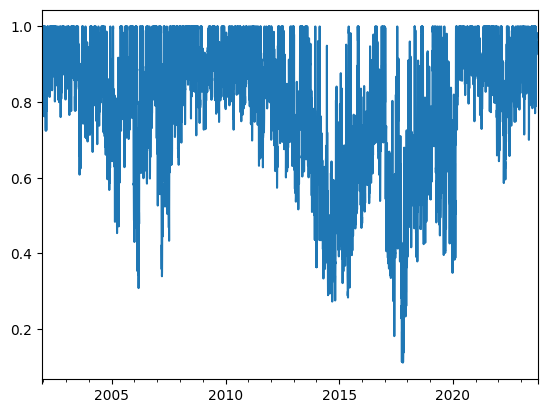

In [56]:
results.cash_weight.plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

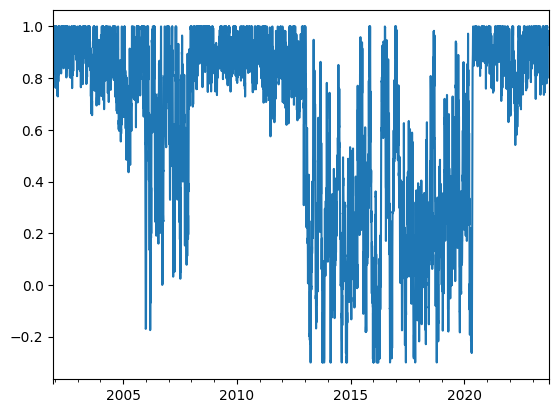

In [51]:
results2.cash_weight.plot()

In [18]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.07806049414973948
volatility: 0.0864092072236494
max drawdown: -0.12276728404546744
max leverage: 1.6001132457714724
sharpe: 0.9033816725999894
turnover: 54.88883066359304


In [19]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.12427344655214911
volatility: 0.10723979874675486
max drawdown: -0.1913216585048766
max leverage: 1.7227424750442972
sharpe: 1.158836998991568
turnover: 54.75863135003089


In [21]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.11770992976245821
volatility: 0.14492892749813072
max drawdown: -0.23206098485749815
max leverage: 1.494933697164318
sharpe: 0.812190718543587
turnover: 52.543953029128545


In [23]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.0591100891243838
volatility: 0.090228798050163
max drawdown: -0.10525915380271766
max leverage: 1.919951771504085
sharpe: 0.6551133385542979
turnover: 55.11648802167524


In [25]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.10548705769841667
volatility: 0.10521770296138792
max drawdown: -0.22155491045540587
max leverage: 1.8598160396092196
sharpe: 1.002559975455153
turnover: 54.75302901859191


In [27]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.11945965017469508
volatility: 0.10754735305564805
max drawdown: -0.15218095978938673
max leverage: 1.7869691131510583
sharpe: 1.11076327571617
turnover: 54.63671849166984


In [274]:
gamma_turn = duals["Turnover"].quantile(0.8)
gamma_leverage = duals2["Leverage"].quantile(0.8)
gamma_risk = duals2["Risk"].quantile(0.8)
hyperparameters = HyperParameters(
    gamma_hold=0, 
    gamma_trade=0, 
    gamma_turn=gamma_turn, 
    gamma_leverage=gamma_leverage, 
    gamma_risk=gamma_risk,
)

targets = Targets(
    T_target=10/252,
    L_target=1.6,
    risk_target=0.1/np.sqrt(252),
)
limits = Limits(
    T_max=1e6,
    L_max=1e6,
    risk_max=1e6,
)

results3, duals3 = run_markowitz(
            full_markowitz,
            prices,
            spread,
            volume,
            rf,
            targets=targets,
            limits=limits,
            hyperparameters=hyperparameters,
            hard=False,
            verbose=True,
        )

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1395: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190, 2011-11-22 00:00:00
Day 3200 of 6190, 2012-04-10 00:00:00
Day 3300 of 6190, 2012-08-28 00:00:00
SolverError
None
Problem status:  None
Day 3400 of 6190, 2013-01-15 00:00:00
Day 3500 of 6190, 2013-06-04 00:00:00
Day 3600 of 6190, 2013-10-22 00:00:00
Day 3700 of 6190, 2014-03-11 00:00:00
Day 3800 of 6190, 2014-07-29 00:00:00
Day 3900 of 6190, 2014-12-16 00:00:00
Day 4000 of 6190, 2015-05-05 00:00:00
SolverError
None
Problem status:  None
Day 4100 of 6190, 2015-09-22 00:00:00
Day 4200 of 6190, 2016-02-09 00:00:00
Day 4300 of 6190, 2016-06-28 00:00:00
Day 4400 of 6190, 2016-11-15 00:00:00
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
Day 4500 of 6190, 2017-04-04 00:00:00
SolverError
None
Problem status:  None
Day 4

<Axes: >

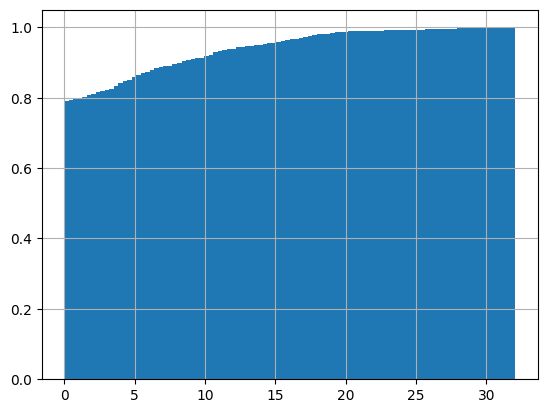

In [235]:
risks = duals2.Risk
risks.sort_values()[:-10].hist(bins=100, cumulative=True, density=True)

In [275]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 1.4054113538538715
volatility: 2.7705025554624667
max drawdown: -6.881043671766568
max leverage: 2907.9629280837084
sharpe: 0.5072766856261834
turnover: 837.3384576141522


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

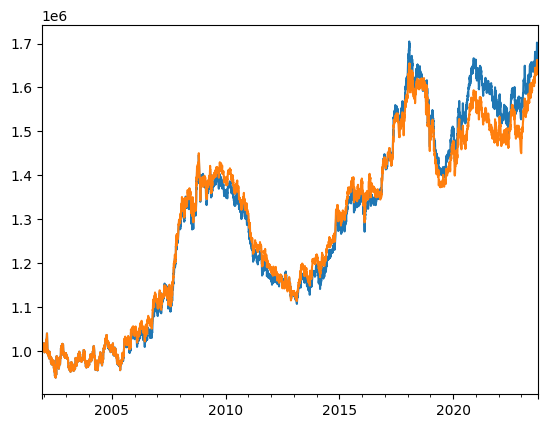

In [280]:
results2.portfolio_value.plot()
results3.portfolio_value.plot()

In [276]:
print(f"mean: {results2.mean_return}")
print(f"volatility: {results2.volatility}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.02569292023752041
volatility: 0.06832539192035111
max drawdown: -0.23423087079539273
max leverage: 1.6054177148793125
sharpe: 0.3760376562123696
turnover: 14.715135792216339


In [277]:
print(f"mean: {results3.mean_return}")
print(f"volatility: {results3.volatility}")
print(f"max drawdown: {results3.max_drawdown}")
print(f"max leverage: {results3.max_leverage}")
print(f"sharpe: {results3.sharpe}")
print(f"turnover: {results3.turnover}")

mean: 0.02489071927771867
volatility: 0.06771749364194188
max drawdown: -0.2317591518400668
max leverage: 1.6447605262262055
sharpe: 0.36756704861714223
turnover: 14.683478760267239


In [262]:
results3.sharpe

0.45520111960920084

In [257]:
results3.sharpe

0.3187643835940952

(0.0, 0.1)

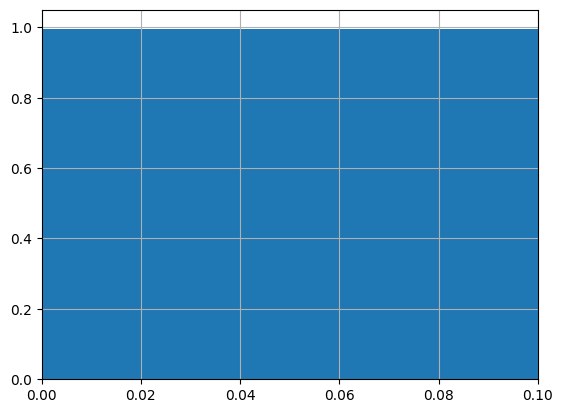

In [232]:
risks.hist(bins=100, cumulative=True, density=True)
plt.xlim(0, 0.1)

<Axes: >

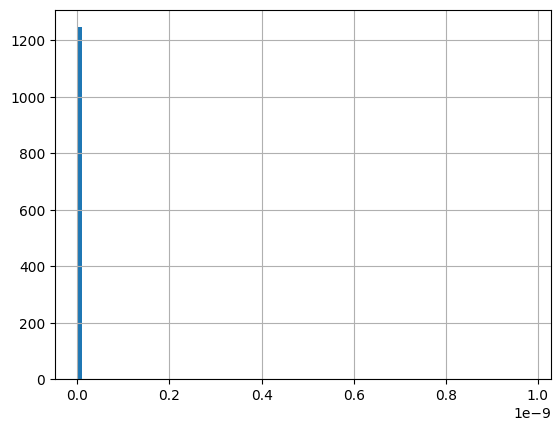

In [225]:
duals2.Turnover.sort_values().hist(bins=100)

(0.0, 0.1)

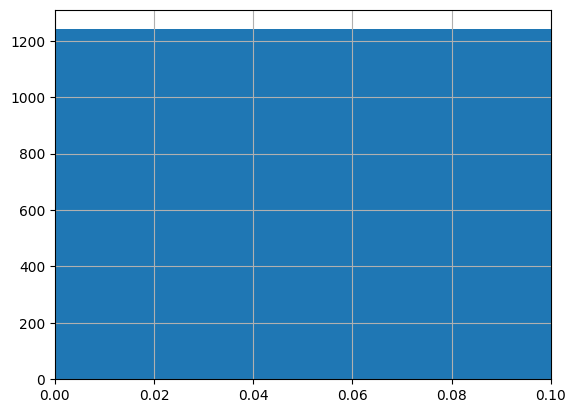

In [215]:
duals2.Risk.hist(bins=100, cumulative=True)
plt.xlim(0,0.1)

In [216]:
duals2.Risk.shape

(1249,)

<Axes: >

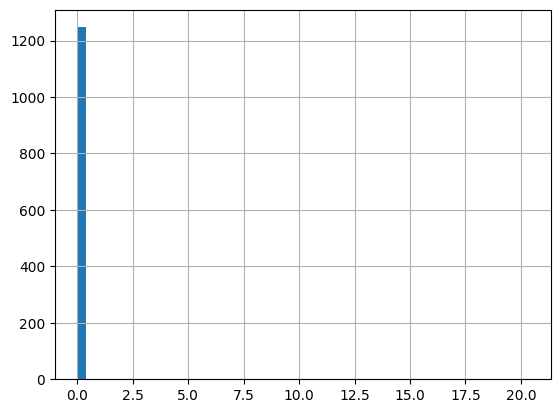

In [188]:
duals2.Risk.hist(bins=50)
# plt.xlim(0.5, 1)

<Axes: >

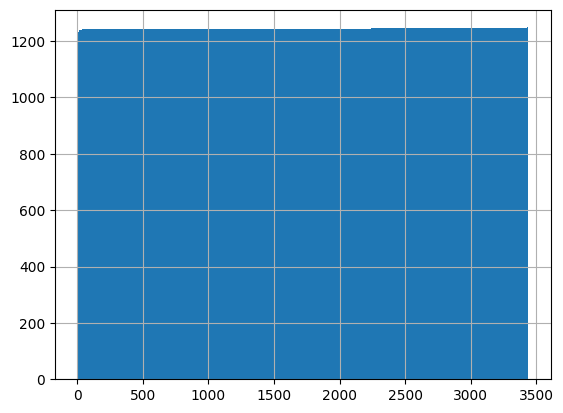

In [204]:
duals2.Turnover.hist(cumulative=True, bins=500)

<Axes: >

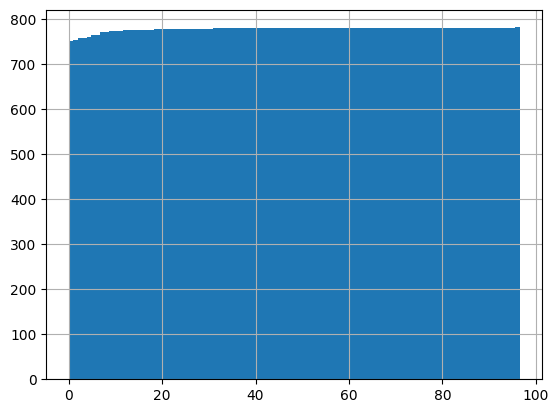

In [198]:
duals.Risk.hist(cumulative=True, bins=100)

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

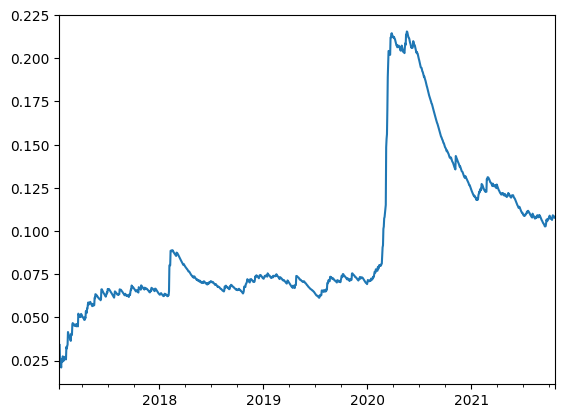

In [134]:
(results.portfolio_returns.ewm(halflife=63).std()*np.sqrt(252)).plot()

In [136]:
results.sharpe

0.6717101394954216

In [114]:
duals.Risk.isna

0.15007211250825284

In [72]:
results.sharpe

0.593913947190349

In [68]:
# shift but dont remove first 4
smoothing_len = 21

returns_new = returns_train.shift(-smoothing_len+1)
returns_new =  pd.concat([returns_train.iloc[:smoothing_len-1], returns_new])
# update first 4 index to be 0,1,2,3
index_new = returns_new.index.tolist()
index_new[:smoothing_len-1] = [i for i in range(smoothing_len-1)]
returns_new.index = index_new


In [69]:
returns_new.rolling(smoothing_len).mean().ffill().dropna()

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2015-02-12,-0.002328,-0.001015,0.001383,-0.001818,0.002458,-0.002875,-0.001621,0.002496,-0.004211,-0.003430,...,-0.000203,0.002339,-0.002141,-0.000235,0.001570,0.000196,0.000983,0.002571,0.003087,0.001542
2015-02-13,0.000173,-0.000631,0.001181,-0.002456,0.001192,-0.004100,-0.002171,0.001373,-0.004625,-0.004558,...,-0.000372,0.001336,-0.002612,-0.001016,0.001045,0.000144,0.000299,0.000510,0.002124,0.000480
2015-02-16,0.002125,-0.000009,0.001314,-0.002924,0.001776,-0.004217,-0.001515,0.001518,-0.005325,-0.004568,...,0.000411,0.002250,-0.001418,-0.000358,0.001582,0.000836,0.001635,0.001632,0.002416,0.000407
2015-02-17,0.001868,-0.000319,0.001574,-0.003829,0.001591,-0.004199,-0.001255,0.001336,-0.005623,-0.004950,...,0.000257,0.001701,-0.001658,-0.000672,0.001000,0.000211,0.001295,0.001649,0.002465,0.000561
2015-02-18,0.001728,0.000381,0.001889,-0.002220,0.001356,-0.002409,-0.000945,0.001808,-0.004092,-0.003660,...,0.001397,0.001392,-0.000210,-0.000693,-0.000226,0.000002,0.001604,0.001043,0.003037,0.000748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-20,0.001447,-0.000620,-0.003052,0.000279,0.001611,0.004960,0.000783,-0.001574,0.006977,0.005096,...,0.004540,0.004656,0.004255,0.007559,-0.001629,0.001745,-0.002595,-0.001221,0.004889,0.003185
2021-10-21,0.001447,-0.000620,-0.003052,0.000279,0.001611,0.004960,0.000783,-0.001574,0.006977,0.005096,...,0.004540,0.004656,0.004255,0.007559,-0.001629,0.001745,-0.002595,-0.001221,0.004889,0.003185
2021-10-22,0.001447,-0.000620,-0.003052,0.000279,0.001611,0.004960,0.000783,-0.001574,0.006977,0.005096,...,0.004540,0.004656,0.004255,0.007559,-0.001629,0.001745,-0.002595,-0.001221,0.004889,0.003185
2021-10-25,0.001447,-0.000620,-0.003052,0.000279,0.001611,0.004960,0.000783,-0.001574,0.006977,0.005096,...,0.004540,0.004656,0.004255,0.007559,-0.001629,0.001745,-0.002595,-0.001221,0.004889,0.003185


In [64]:
(-0.064294 + -0.029822	)/2

-0.047058

In [70]:
returns_train.iloc[:21].mean()

T0     -0.002328
T1     -0.001015
T3      0.001383
T4     -0.001818
T5      0.002458
          ...   
T95     0.000196
T96     0.000983
T98     0.002571
T99     0.003087
T100    0.001542
Length: 75, dtype: float64

In [48]:
# 21 day forward smoothing (rolling windom)

returns_train

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2015-02-12,-0.064294,-0.005820,0.001152,0.001438,0.020557,0.017905,-0.004718,0.016787,0.013254,0.019536,...,0.008291,0.010640,0.011953,0.004955,0.007259,0.003996,0.005960,0.025479,0.007555,0.017812
2015-02-13,-0.029822,-0.004243,0.011072,0.019156,0.001680,0.017318,-0.004270,0.005696,0.027043,0.010827,...,0.000426,-0.001939,-0.008268,0.003756,0.004404,-0.003591,-0.002684,-0.005171,0.000435,0.008567
2015-02-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-02-17,0.012807,-0.002634,0.001267,0.002936,0.007206,-0.003369,-0.004285,-0.000480,-0.005868,-0.003427,...,0.014172,0.005829,-0.001554,0.007072,0.037336,0.008964,0.003147,0.014199,-0.001956,0.000723
2015-02-18,0.008853,-0.004882,0.008345,-0.006794,-0.012147,-0.017437,-0.001915,-0.002497,-0.025047,-0.021923,...,-0.007686,0.000690,0.007623,0.001073,0.005509,0.005311,0.005058,-0.008250,0.019161,-0.015352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-20,0.012915,0.024067,0.000926,0.015163,0.013466,0.013072,0.008863,-0.003680,0.009292,0.005513,...,0.005819,0.009421,0.014836,0.007637,-0.003355,0.019554,0.000162,0.020378,0.003992,-0.003576
2021-10-21,-0.011860,-0.004102,-0.008466,-0.010039,-0.007844,-0.012549,-0.005126,0.004632,-0.018810,-0.018169,...,-0.010463,0.010711,-0.006898,0.021354,-0.001149,0.009413,0.005414,-0.043636,0.023541,0.003390
2021-10-22,0.054150,-0.008616,-0.006392,-0.001891,0.013451,0.009487,0.001840,-0.011206,0.015149,0.006860,...,0.010698,0.005936,0.008197,0.021908,0.011837,0.007600,0.003914,0.012976,0.008016,0.006556
2021-10-25,-0.025497,-0.006614,-0.000470,0.007775,-0.004890,0.009308,-0.004041,0.015287,0.010565,0.019487,...,0.005333,0.013332,0.011645,0.000445,0.003818,0.001827,0.004617,0.005004,0.004526,-0.000790


In [33]:
results.sharpe

0.6706092750897725

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

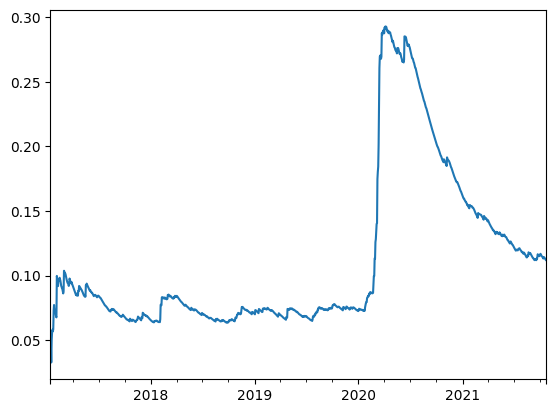

In [32]:
(results.portfolio_returns.ewm(halflife=63).std()*np.sqrt(252)).plot()

In [5]:
parameter_dict, best_iter = tune_parameters(
    full_markowitz,
    prices_train,
    spread_train,
    volume_train,
    rf_train,
    0.1/np.sqrt(252),
)

SolverError
None
Problem status:  None
Problem status:  infeasible_inaccurate
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1395: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Problem status:  infeasible_inaccurate
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
SolverError
None
Problem status:  None
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
SolverError
None
Problem status:  None
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasible_inaccurate
Problem status:  infeasib

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

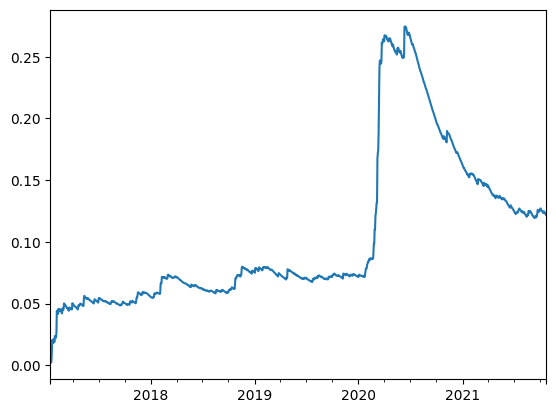

In [23]:
([*parameter_dict.values()][2][1].portfolio_returns.ewm(halflife=63).std()*np.sqrt(252)).plot()

In [323]:
parameter_dict = tune_parameters(
    full_markowitz,
    prices_train,
    spread_train,
    volume_train,
    rf_train,
    0.1/np.sqrt(252),
)

SR: 0.020063744780476556
Iteration number 1; current sharpe: 0.020063744780476556


KeyboardInterrupt: 

In [317]:
for i in range(6):
    print(f"iteration {i}: {parameter_dict[i][1].sharpe}")



iteration 0: 1.1340514710076366


KeyError: 1

In [305]:
res = [*parameter_dict.values()][-1][1]
res.sharpe

0.461541717928363

In [199]:
len([*parameter_dict.values()])

2

In [196]:
params1 = [*parameter_dict.values()][1][0]

IndexError: list index out of range

In [192]:
params1

HyperParameters(gamma_hold=0, gamma_trade=0, gamma_turn=0, gamma_leverage=0, gamma_risk=0)

In [190]:
params

HyperParameters(gamma_hold=1, gamma_trade=1, gamma_turn=0.43961006880888853, gamma_leverage=0.10846804268846431, gamma_risk=5.309493434006647)

In [25]:
params = [*parameter_dict.values()][-1][0]
res = [*parameter_dict.values()][-1][1]

duals = parameter_dict["hard"][2]

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

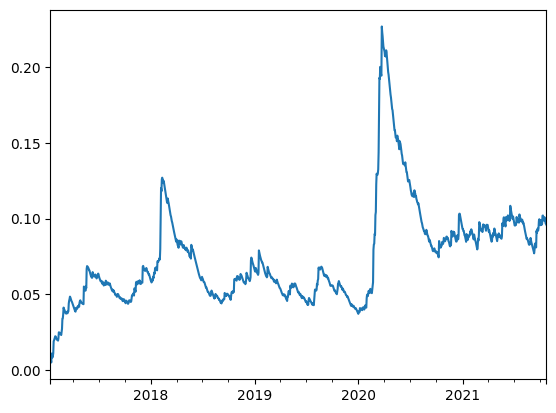

In [38]:
(res.portfolio_returns.ewm(halflife=21).std()*np.sqrt(252)).plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

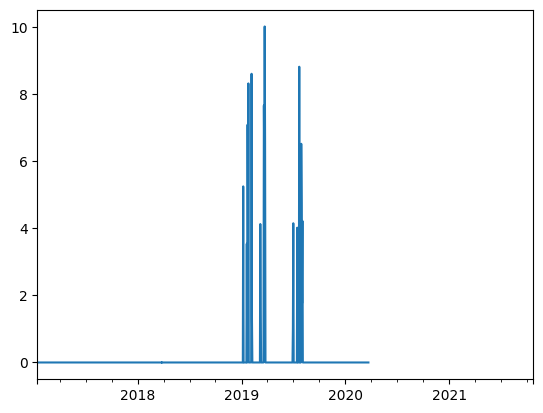

In [127]:
duals.Risk.plot()

In [207]:
duals.Risk.quantile(0.99)


7.291708678908718

In [244]:
hyperparameters

HyperParameters(gamma_hold=1, gamma_trade=1, gamma_turn=1, gamma_leverage=1, gamma_risk=1)

In [259]:
hyperparameters = HyperParameters(
    0, 0, 1, 1, 1
)

results, duals = run_markowitz(
            full_markowitz,
            prices,
            spread,
            volume,
            rf,
            0.1/np.sqrt(252),
            hyperparameters,
            verbose=True,
            hard=False,
        )

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

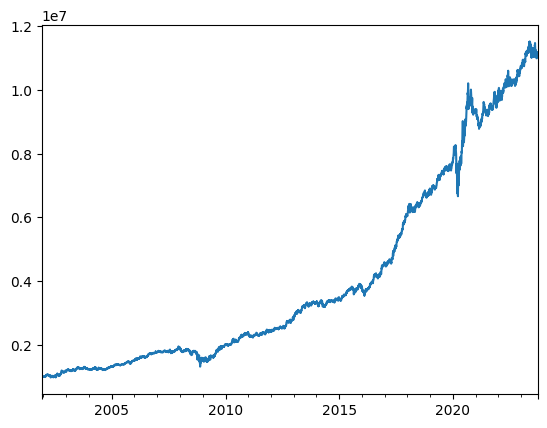

In [260]:
results.portfolio_value.plot()

In [265]:
results.max_drawdown    

-0.32638803873043054

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

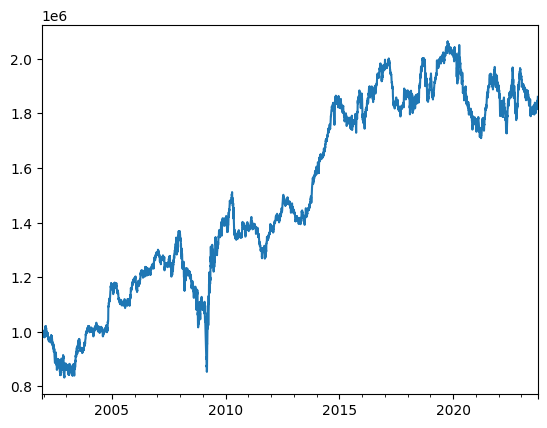

In [256]:
results.portfolio_value.plot()

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

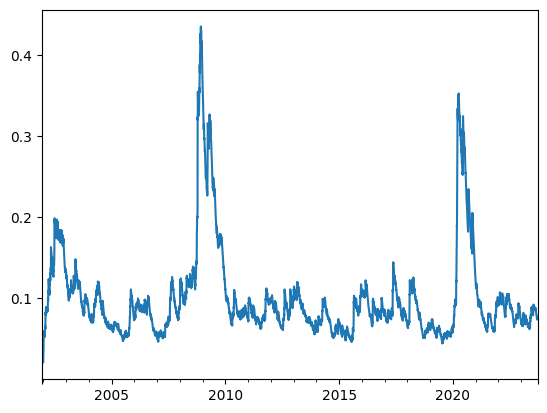

In [266]:
(results.portfolio_returns.ewm(halflife=21).std()*np.sqrt(252)).plot()

In [237]:
hyperparameters.copy()

AttributeError: 'HyperParameters' object has no attribute 'copy'

In [233]:
results.volatility

0.07567858373584031

In [230]:
duals.Risk.min()

26.399360132325086

In [164]:
results.volatility

0.08739814019039631

In [175]:
duals.Risk.quantile(0.95)

0.6879906219654076

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

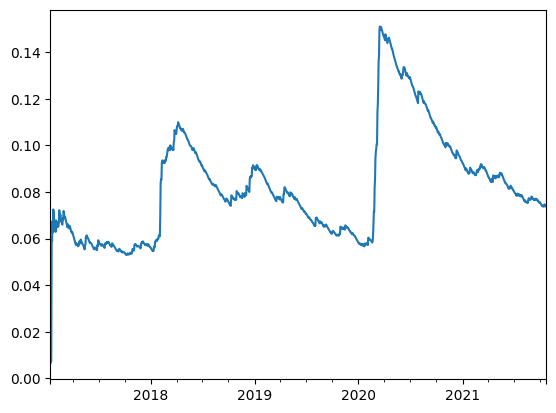

In [166]:
(results.portfolio_returns.ewm(halflife=63).std()*np.sqrt(252)).plot()

In [169]:
(results.portfolio_returns.ewm(halflife=63,min_periods=3).std()*np.sqrt(252)).dropna()

2017-01-16    0.007529
2017-01-17    0.060492
2017-01-18    0.059110
2017-01-19    0.067469
2017-01-20    0.062657
                ...   
2021-10-19    0.074412
2021-10-20    0.074055
2021-10-21    0.074080
2021-10-22    0.073719
2021-10-25    0.074138
Length: 1246, dtype: float64

In [45]:
duals

,FullInvestment,Cash,CLower,CUpper,WLower,WUpper,ZLower,ZUpper,Leverage,Turnover,Risk
2017-01-11,-0.022493,-0.022493,0.0,0.044987,"[8.645497121924764e-11, 8.64822986322676e-11, ...","[5.800290108533934e-11, 5.799849478351272e-11,...","[1.7353178972992174e-10, 1.7420510911588984e-1...","[1.7260021333071972e-10, 1.7196232545446157e-1...",0.0,0.130603,0.0
2017-01-12,-0.0,0.0,0.0,0.0,"[5.018588651634246e-12, 5.022938163623848e-12,...","[3.4946538881237427e-12, 3.4908557875011e-12, ...","[9.587590432590033e-12, 9.602293370062933e-12,...","[9.586888282691358e-12, 9.577822572341868e-12,...",0.0,0.203461,0.0
2017-01-13,0.0,-0.0,0.0,0.0,"[1.515752557183404e-11, 1.514591080735209e-11,...","[1.0449990100511559e-11, 1.0460508939054161e-1...","[2.97196472835524e-11, 2.9618176977133126e-11,...","[2.9427945501515436e-11, 2.95060877016097e-11,...",0.0,0.235401,0.0
2017-01-16,-0.0,0.0,0.0,0.0,"[6.367283836479898e-12, 6.368442563105979e-12,...","[4.3978822845228444e-12, 4.3990596182824394e-1...","[1.2449143416888898e-11, 1.2441485308561364e-1...","[1.2399102256135143e-11, 1.2402581819105919e-1...",0.0,0.176878,0.0
2017-01-17,-0.0,0.0,0.0,0.0,"[1.809540445246482e-12, 1.8071270123336188e-12...","[1.2979713187599259e-12, 1.2990121049300156e-1...","[3.4446674918545197e-12, 3.4424426740040523e-1...","[3.4214121539083812e-12, 3.4251743379707055e-1...",0.0,0.169632,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
results.volatility

0.08998748651468831

In [35]:
duals.Risk.dropna().median()

3.7107741831158124e-07

In [34]:
2.0178709772998465e-06

2.0178709772998465e-06

In [20]:
params

HyperParameters(gamma_hold=1, gamma_trade=0.5, gamma_turn=0.4139728480824029, gamma_leverage=0.06763282443730048, gamma_risk=2.0178709772998465e-06)

In [22]:
res.volatility

0.08413656506603158

In [95]:
res = [*parameter_dict.values()][-1][1]

In [94]:
res = [*parameter_dict.values()][-1][1]

HyperParameters(gamma_hold=1.5, gamma_trade=0.5, gamma_turn=0.8298874131078795, gamma_leverage=5.100934264218233e-09, gamma_risk=18.116732358099316)

In [70]:
results.sharpe

0.5040844840830921

In [62]:
risk_target = 0.1 / np.sqrt(252)
hyperparameters = HyperParameters(
    0, 0, 0, 0, 0
)

results, duals = run_markowitz(
    strategy,
    prices,
    spread,
    volume,
    rf,
    risk_target,
    hyperparameters,
    verbose=True,
) 

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1395: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190, 2011-11-22 00:00:00
Day 3200 of 6190, 2012-04-10 00:00:00
Day 3300 of 6190, 2012-08-28 00:00:00
Day 3400 of 6190, 2013-01-15 00:00:00
Day 3500 of 6

In [63]:
print(f"mean: {results.mean_return}")
print(f"volatility: {results.volatility}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.04523447537467463
volatility: 0.08973590103046751
max drawdown: -0.2965556038964159
max leverage: 2.504314108737476
sharpe: 0.5040844840830921
turnover: 12.89692623810611


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

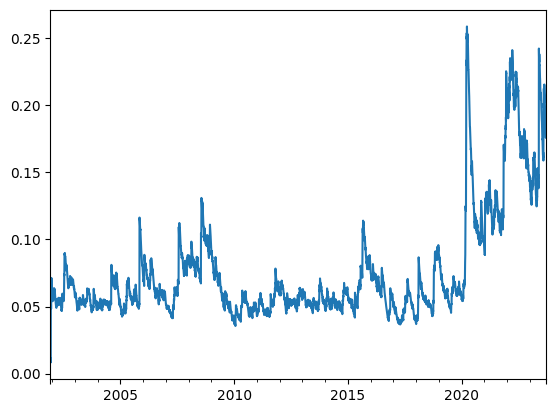

In [64]:
(results.portfolio_returns.ewm(halflife=21).std()*np.sqrt(252)).plot()

In [18]:
cons[0].name

'long_only'

In [3]:
t = returns.index[0]

prices_t = prices.loc[t]
returns_t = returns.loc[t]
spread_t = spread.loc[t]
volume_t = volume.loc[t]
rf_t = rf.loc[t]

Sigma_t = returns.cov()
mu_t = returns.mean()

risk_target = 0.1 / np.sqrt(252) 
T_max = 10 / 252
# T_max = 1

L_max = 1.6

In [4]:
def get_data_and_parameters(inputs, risk_target, T_max, L_max):

    n_assets = inputs.n_assets
    latest_prices = inputs.prices.iloc[-1]
    portfolio_value = inputs.cash + inputs.quantities @ latest_prices

    data = Data(
        w_prev=(inputs.quantities * latest_prices / portfolio_value),
        c_prev=(inputs.cash / portfolio_value),
        idio_mean=np.zeros(n_assets),
        factor_mean=inputs.mean.values,
        risk_free=0,
        factor_covariance_chol=np.linalg.cholesky(inputs.covariance.values),
        idio_volas=np.zeros(n_assets),
        F=np.eye(n_assets),
        kappa_short=np.zeros(n_assets),
        kappa_borrow=0.0,
        kappa_spread=np.zeros(n_assets),
        kappa_impact=np.zeros(n_assets),
    )

    param = Parameters(
        w_lower=-0.1,
        w_upper=0.15,
        c_lower=-0.3,
        c_upper=0.4,
        z_lower=-np.ones(data.n_assets) * 1e3,
        z_upper=np.ones(data.n_assets) * 1e3,
        T_max=T_max,
        L_max=L_max,
        rho_mean=np.zeros(data.n_assets),
        rho_covariance=0.0,
        gamma_hold=0.0,
        gamma_trade=0.0,
        gamma_turn=0.0,
        gamma_risk=0,
        risk_target=risk_target,
        gamma_c_lower=None,
        gamma_c_upper=None,
        gamma_w_lower=None,
        gamma_w_upper=None,
        gamma_z_lower=None,
        gamma_z_upper=None,
        gamma_L_max=None,
    )

    return data, param

def get_data_and_parameters2(inputs, gamma_risk, gamma_turn, gamma_c_lower, gamma_c_upper, gamma_w_lower, gamma_w_upper, gamma_z_lower, gamma_z_upper, gamma_L_max, risk_target, T_max, L_max=1.6):
                             
    n_assets = inputs.n_assets
    latest_prices = inputs.prices.iloc[-1]
    portfolio_value = inputs.cash + inputs.quantities @ latest_prices

    data = Data(
        w_prev=(inputs.quantities * latest_prices / portfolio_value),
        c_prev=(inputs.cash / portfolio_value),
        idio_mean=np.zeros(n_assets),
        factor_mean=inputs.mean.values,
        risk_free=0,
        factor_covariance_chol=np.linalg.cholesky(inputs.covariance.values),
        idio_volas=np.zeros(n_assets),
        F=np.eye(n_assets),
        kappa_short=np.zeros(n_assets),
        kappa_borrow=0.0,
        kappa_spread=np.zeros(n_assets),
        kappa_impact=np.zeros(n_assets),
    )

    # param = Parameters(
    #     w_lower=-0.1,
    #     w_upper=0.15,
    #     c_lower=-0.3,
    #     c_upper=0.4,
    #     z_lower=-np.ones(data.n_assets) * 1e3,
    #     z_upper=np.ones(data.n_assets) * 1e3,
    #     T_max=0,
    #     L_max=L_max,
    #     rho_mean=np.zeros(data.n_assets),
    #     rho_covariance=0.0,
    #     gamma_hold=0.0,
    #     gamma_trade=0.0,
    #     gamma_turn=gamma_turn,
    #     gamma_risk=gamma_risk,
    #     risk_target=inputs.risk_target,
    # )

    param = Parameters(
        w_lower=-0.1,
        w_upper=0.15,
        c_lower=-0.3,
        c_upper=0.4,
        z_lower=-np.ones(data.n_assets) * 1e3,
        z_upper=np.ones(data.n_assets) * 1e3,
        T_max=T_max,
        L_max=L_max,
        rho_mean=np.zeros(data.n_assets),
        rho_covariance=0.0,
        gamma_hold=0.0,
        gamma_trade=0.0,
        gamma_turn=gamma_turn,
        gamma_risk=gamma_risk,
        risk_target=inputs.risk_target,
        gamma_c_lower=gamma_c_lower,
        gamma_c_upper=gamma_c_upper,
        gamma_w_lower=gamma_w_lower,
        gamma_w_upper=gamma_w_upper,
        gamma_z_lower=gamma_z_lower,
        gamma_z_upper=gamma_z_upper,
        gamma_L_max=gamma_L_max,
    )

    

    return data, param


    

In [18]:
import time
import cvxpy as cp
def run_markowitz(
    # strategy: Callable, risk_target: float, verbose: bool = False,
    prices, spread, volume, rf, hard=True, verbose: bool = False,
) -> tuple[pd.Series, pd.DataFrame]:
    """
    Run a simplified backtest for a given strategy.
    At time t we use data from t-lookback to t to compute the optimal portfolio
    weights and then execute the trades at time t.
    """

    # prices, spread, volume, rf = load_data()
    n_assets = prices.shape[1]

    lookback = 500

    # Initialize quantities as equally weighted fully invested portfolio
    prices0 = prices.iloc[lookback]
    quantities = np.ones(n_assets) * (1 / prices0) / np.sum(1 / prices0)
    cash = 0

    post_trade_cash = []
    post_trade_quantities = []

    if hard:
        dual_optimals = pd.DataFrame(columns=["Risk", "Turnover", "CLower", "CUpper", "WUpper", "WLower", "ZUpper", "ZLower", "Leverage"], index=prices.index[lookback:-1])
    
    timings = []

    returns = prices.pct_change().dropna() 
    means = (
        synthetic_returns(prices, information_ratio=0.07).shift(-1).dropna()
    )  # At time t includes data up to t+1
    covariance_df = returns.ewm(halflife=125).cov()  # At time t includes data up to t
    days = returns.index
    covariances = {}
    for day in days:
        covariances[day] = covariance_df.loc[day]

    for t in range(lookback, len(prices) - 1):
        start_time = time.perf_counter()

        day = prices.index[t]

        if verbose and t%100 == 0:
            print(f"Day {t} of {len(prices)-1}, {day}")

        prices_t = prices.iloc[t - lookback : t + 1]  # Up to t
        spread_t = spread.iloc[t - lookback : t + 1]
        volume_t = volume.iloc[t - lookback : t + 1]

        mean_t = means.loc[day]  # Forecast for return t to t+1
        covariance_t = covariances[day]  # Forecast for covariance t to t+1

        inputs_t = OptimizationInput(
            prices_t,
            mean_t,
            covariance_t,
            spread_t,
            volume_t,
            quantities,
            cash,
            risk_target,
            rf.iloc[t],
        )

        data, param = get_data_and_parameters(inputs_t, risk_target, T_max, L_max)

        success = True
        try:
            w, _, problem = markowitz_hard(data, param)
        except (AssertionError, cp.SolverError) as e:
            print("Failed: removing T_max")
            data, param = get_data_and_parameters(inputs_t, risk_target, T_max=1e3, L_max=L_max)
            try :
                success = False
                w, _, problem = markowitz_hard(data, param)
            except (AssertionError, cp.SolverError) as f:
                print("Failed: removing L_max")
                # data, param = get_data_and_parameters(inputs_t, risk_target, T_max=1, L_max=3)
                # w, _, problem = markowitz_hard(data, param)


            

        latest_prices = prices.iloc[t]  # At t
        latest_spread = spread.iloc[t]

        cash += interest_and_fees(
            cash, rf.iloc[t - 1], quantities, prices.iloc[t - 1], day
        )
        trade_quantities = create_orders(w, quantities, cash, latest_prices)
        quantities += trade_quantities
        cash += execute_orders(latest_prices, trade_quantities, latest_spread)

        post_trade_cash.append(cash)
        post_trade_quantities.append(quantities.copy())
        dual_optimals.loc[day, "CLower"] = problem.constraints[2].dual_value
        dual_optimals.loc[day, "CUpper"] = problem.constraints[3].dual_value
        dual_optimals.loc[day, "WLower"] = problem.constraints[4].dual_value
        dual_optimals.loc[day, "WUpper"] = problem.constraints[5].dual_value
        dual_optimals.loc[day, "ZLower"] = problem.constraints[6].dual_value
        dual_optimals.loc[day, "ZUpper"] = problem.constraints[7].dual_value
        dual_optimals.loc[day, "Leverage"] = problem.constraints[8].dual_value
        if success:
            dual_optimals.loc[day, "Turnover"] = problem.constraints[9].dual_value
        else:
            try:
                dual_optimals.loc[day, "Turnover"] = dual_optimals.loc[prices.index[t-1], "Turnover"]
            except KeyError:
                dual_optimals.loc[day, "Turnover"] = problem.constraints[9].dual_value
        success = True
        dual_optimals.loc[day, "Risk"] = problem.constraints[10].dual_value

        # dual_optimals.append(problem.constraints[-1].dual_value)

        # Timings
        end_time = time.perf_counter()
        timings.append(Timing.get_timing(start_time, end_time, problem))

    post_trade_cash = pd.Series(post_trade_cash, index=prices.index[lookback:-1])
    post_trade_quantities = pd.DataFrame(
        post_trade_quantities, index=prices.index[lookback:-1], columns=prices.columns
    )

    return BacktestResult(post_trade_cash, post_trade_quantities, risk_target, timings), dual_optimals

####################
def run_soft_markowitz(
    prices, spread, volume, rf, priorities, verbose: bool = False,
) -> tuple[pd.Series, pd.DataFrame]:
    """
    Run a simplified backtest for a given strategy.
    At time t we use data from t-lookback to t to compute the optimal portfolio
    weights and then execute the trades at time t.
    """

    # prices, spread, volume, rf = load_data()
    n_assets = prices.shape[1]

    lookback = 500
    
    prices0 = prices.iloc[lookback]
    quantities = np.ones(n_assets) * (1 / prices0) / np.sum(1 / prices0)
    cash = 0

    post_trade_cash = []
    post_trade_quantities = []
    timings = []
    risks = pd.Series(index=prices.index[lookback:-1])
    turnovers = pd.Series(index=prices.index[lookback:-1])

    returns = prices.pct_change().dropna() 
    means = (
        synthetic_returns(prices, information_ratio=0.07).shift(-1).dropna()
    )  # At time t includes data up to t+1
    covariance_df = returns.ewm(halflife=125).cov()  # At time t includes data up to t
    days = returns.index
    covariances = {}
    for day in days:
        covariances[day] = covariance_df.loc[day]

    for t in range(lookback, len(prices) - 1):
        start_time = time.perf_counter()

        day = prices.index[t]

        if verbose and t%100 == 0:
            print(f"Day {t} of {len(prices)-1}, {day}")

        prices_t = prices.iloc[t - lookback : t + 1]  # Up to t
        spread_t = spread.iloc[t - lookback : t + 1]
        volume_t = volume.iloc[t - lookback : t + 1]

        mean_t = means.loc[day]  # Forecast for return t to t+1
        covariance_t = covariances[day]  # Forecast for covariance t to t+1

        inputs_t = OptimizationInput(
            prices_t,
            mean_t,
            covariance_t,
            spread_t,
            volume_t,
            quantities,
            cash,
            risk_target,
            rf.iloc[t],
        )

        gamma_risk=priorities.loc[day].Risk
        gamma_turn=priorities.loc[day].Turnover
        gamma_c_lower=priorities.loc[day].CLower
        gamma_c_upper=priorities.loc[day].CUpper
        gamma_w_lower=priorities.loc[day].WLower
        gamma_w_upper=priorities.loc[day].WUpper
        gamma_z_lower=priorities.loc[day].ZLower
        gamma_z_upper=priorities.loc[day].ZUpper
        gamma_L_max=priorities.loc[day].Leverage


        data, param = get_data_and_parameters2(inputs_t, 
                                               gamma_risk=gamma_risk, gamma_turn=gamma_turn, gamma_c_lower=gamma_c_lower, gamma_c_upper=gamma_c_upper, gamma_w_lower=gamma_w_lower, gamma_w_upper=gamma_w_upper, gamma_z_lower=gamma_z_lower, gamma_z_upper=gamma_z_upper, gamma_L_max=gamma_L_max, risk_target=risk_target, T_max=T_max, L_max=L_max)

        w, _, problem = markowitz(data, param)

        latest_prices = prices.iloc[t]  # At t
        latest_spread = spread.iloc[t]

        cash += interest_and_fees(
            cash, rf.iloc[t - 1], quantities, prices.iloc[t - 1], day
        )
        trade_quantities = create_orders(w, quantities, cash, latest_prices)
        quantities += trade_quantities
        cash += execute_orders(latest_prices, trade_quantities, latest_spread)

        post_trade_cash.append(cash)
        post_trade_quantities.append(quantities.copy())

        risk = np.sqrt(np.dot(np.dot(w, covariance_t), w)) * np.sqrt(252)
        turnover = np.sum(np.abs(w - data.w_prev))
        risks.loc[day] = risk
        turnovers.loc[day] = turnover

        # Timings
        end_time = time.perf_counter()
        timings.append(Timing.get_timing(start_time, end_time, problem))

    post_trade_cash = pd.Series(post_trade_cash, index=prices.index[lookback:-1])
    post_trade_quantities = pd.DataFrame(
        post_trade_quantities, index=prices.index[lookback:-1], columns=prices.columns
    )

    return BacktestResult(post_trade_cash, post_trade_quantities, risk_target, timings), risks, turnovers

In [19]:
results, duals = run_backtest(
    # strategy: Callable, risk_target: float, verbose: bool = False,
    prices, spread, volume, rf, True,
)

Day 500 of 6190, 2001-12-04 00:00:00
Failed: removing T_max
Day 600 of 6190, 2002-04-23 00:00:00
Failed: removing T_max
Day 700 of 6190, 2002-09-10 00:00:00
Failed: removing T_max
Failed: removing T_max
Day 800 of 6190, 2003-01-28 00:00:00
Failed: removing T_max
Failed: removing T_max
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Failed: removing T_max
Failed: removing T_max
Day 2200 of 6190, 2008-06-10 00:00:00
Failed: removing T_max
Failed: removing T_max
Failed: removing T_max
Failed: removing T_max
Failed: removing T_max
Day 2300 of 6190, 2008

In [33]:
10/252 * 252

10.0

In [35]:
print(f"mean: {results.portfolio_returns.mean() * 252}")
print(f"volatility: {results.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")
print(f"turnover: {results.turnover}")

mean: 0.09888883284649798
volatility: 0.10021556428044409
max drawdown: -0.21454040398029073
max leverage: 1.610985064846046
sharpe: 1.004084261845295
turnover: 18.549502794487584


In [69]:
print(f"mean: {results2.portfolio_returns.mean() * 252}")
print(f"volatility: {results2.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.11898647918073932
volatility: 0.13668691122539112
max drawdown: -0.2630880870121153
max leverage: 1.9235078483587063
sharpe: 0.8857859130483625
turnover: 16.61892990122609


In [77]:
(4-2*np.sqrt(3))**2

0.2871870788979635

In [83]:
-72/38 + 20*(1-(37/38)**36) - 20 * (37/38)**36

2.790419081085642

In [76]:
print(f"mean: {results2.portfolio_returns.mean() * 252}")
print(f"volatility: {results2.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")
print(f"turnover: {results2.turnover}")

mean: 0.09231373957817875
volatility: 0.10606003538819855
max drawdown: -0.25982737580283366
max leverage: 2.3699631307778994
sharpe: 0.8856714835842171
turnover: 18.785408351372173


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

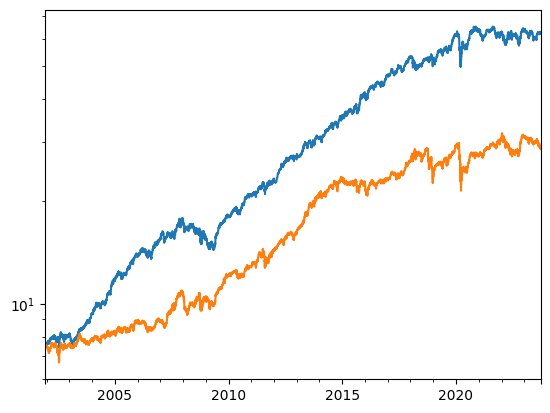

In [73]:
results.portfolio_value.plot()
results2.portfolio_value.plot()

plt.yscale("log")

In [13]:
print(f"mean: {results2.portfolio_returns.mean() * 252}")
print(f"volatility: {results2.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")

mean: 0.10672537668119053
volatility: 0.11644357518590612
max drawdown: -0.19847506847099672
max leverage: 2.983746552565785
sharpe: 0.9326318657509529


In [29]:
results2.portfolio_returns

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/experiments/backtest.py:224: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  return self.portfolio_value.pct_change().dropna()


Series([], dtype: float64)

In [62]:
# create dataframe where rows are duals.WUpper
Wupper = pd.DataFrame([duals.WUpper.values[i] for i in range(duals.shape[0])])
Wupper.index = duals.index
Wupper = Wupper.rolling(100, min_periods=1).quantile(0.8)
WLower = pd.DataFrame([duals.WLower.values[i] for i in range(duals.shape[0])])
WLower.index = duals.index
WLower = WLower.rolling(100, min_periods=1).quantile(0.8)

Zupper = pd.DataFrame([duals.ZUpper.values[i] for i in range(duals.shape[0])])
Zupper.index = duals.index
Zupper = Zupper.rolling(100, min_periods=1).quantile(0.8)
ZLower = pd.DataFrame([duals.ZLower.values[i] for i in range(duals.shape[0])])
ZLower.index = duals.index
ZLower = ZLower.rolling(100, min_periods=1).quantile(0.8)

In [74]:
priorities = pd.DataFrame(index = duals.index, columns=duals.columns)

for t in priorities.index:
    priorities.loc[t]["WUpper"] = Wupper.loc[t].values
    priorities.loc[t]["WLower"] = WLower.loc[t].values
    priorities.loc[t]["ZUpper"] = Zupper.loc[t].values * 0
    priorities.loc[t]["ZLower"] = ZLower.loc[t].values * 0

columns_remaining = ["Risk", "CLower", "CUpper"]
priorities[columns_remaining] = duals[columns_remaining].rolling(100, min_periods=1).quantile(0.99) 

priorities["Leverage"] = duals["Leverage"].rolling(100, min_periods=1).quantile(0.9)
priorities["Turnover"] = duals["Turnover"].rolling(100, min_periods=1).quantile(0.8)

In [18]:
0.00111194306017219 * 1000

1.11194306017219

In [75]:
results2, risks, turnovers = run_backtest2(
    # strategy: Callable, risk_target: float, verbose: bool = False,
    prices, spread, volume, rf, priorities.abs(), True
)

Day 500 of 6190, 2001-12-04 00:00:00
Day 600 of 6190, 2002-04-23 00:00:00
Day 700 of 6190, 2002-09-10 00:00:00
Day 800 of 6190, 2003-01-28 00:00:00
Day 900 of 6190, 2003-06-17 00:00:00
Day 1000 of 6190, 2003-11-04 00:00:00
Day 1100 of 6190, 2004-03-23 00:00:00
Day 1200 of 6190, 2004-08-10 00:00:00
Day 1300 of 6190, 2004-12-28 00:00:00
Day 1400 of 6190, 2005-05-17 00:00:00
Day 1500 of 6190, 2005-10-04 00:00:00
Day 1600 of 6190, 2006-02-21 00:00:00
Day 1700 of 6190, 2006-07-11 00:00:00
Day 1800 of 6190, 2006-11-28 00:00:00
Day 1900 of 6190, 2007-04-17 00:00:00
Day 2000 of 6190, 2007-09-04 00:00:00
Day 2100 of 6190, 2008-01-22 00:00:00
Day 2200 of 6190, 2008-06-10 00:00:00
Day 2300 of 6190, 2008-10-28 00:00:00
Day 2400 of 6190, 2009-03-17 00:00:00
Day 2500 of 6190, 2009-08-04 00:00:00
Day 2600 of 6190, 2009-12-22 00:00:00
Day 2700 of 6190, 2010-05-11 00:00:00
Day 2800 of 6190, 2010-09-28 00:00:00
Day 2900 of 6190, 2011-02-15 00:00:00
Day 3000 of 6190, 2011-07-05 00:00:00
Day 3100 of 6190,

In [68]:
returns

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2000-01-05,-0.025398,0.046893,0.060678,0.029942,-0.004416,0.026336,0.021299,0.041501,-0.018286,0.051260,...,0.019823,-0.003551,0.008401,0.020228,0.061013,0.054994,0.003040,-0.023089,0.057692,-0.003393
2000-01-06,0.021220,-0.010311,0.010249,0.044252,0.015084,0.041056,0.001100,-0.030361,0.045847,0.057275,...,0.029155,-0.003563,0.024993,0.026399,0.039316,-0.067926,0.017840,0.045790,-0.005188,0.044150
2000-01-07,0.013300,-0.003173,0.029033,0.032688,0.017481,0.016898,0.063595,-0.023483,-0.010956,-0.005125,...,0.073653,0.023816,0.043161,-0.023890,0.111840,0.020334,0.002893,0.028248,0.000000,0.017886
2000-01-10,0.014358,-0.005315,-0.014089,-0.032829,-0.017181,-0.026313,-0.029896,0.152305,-0.002769,-0.013982,...,-0.039578,0.030227,0.010344,0.009426,-0.004435,-0.003316,-0.040808,-0.012361,0.016973,-0.028758
2000-01-11,0.009299,-0.014956,-0.014326,-0.015756,-0.023602,-0.009245,0.034007,0.010434,-0.001394,0.011941,...,0.003662,-0.027083,-0.002526,-0.008410,0.005941,0.004999,-0.033434,-0.031988,0.050069,-0.019736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,-0.013304,0.005988,-0.010319,-0.003790,-0.004230,-0.003050,0.004469,0.007567,-0.016158,-0.007926,...,-0.009253,-0.011908,-0.004376,-0.002342,-0.013918,-0.008057,0.003856,-0.011112,-0.006130,-0.008098
2023-09-21,-0.016027,-0.009226,-0.011958,-0.023617,-0.007822,-0.008999,-0.015400,0.002059,-0.017331,-0.014089,...,-0.034250,-0.020008,-0.018636,-0.014019,-0.004085,0.006722,-0.022040,-0.016209,-0.026053,-0.012829
2023-09-22,-0.010536,-0.000300,-0.011203,0.003786,-0.009583,0.006598,0.001043,-0.017890,0.000756,0.001568,...,0.000745,-0.000570,0.000358,-0.010616,-0.002361,-0.010294,-0.009316,-0.006671,-0.008079,-0.025756
2023-09-25,0.000980,-0.003606,0.005412,0.004431,0.004941,0.014614,-0.010417,-0.002954,0.016029,0.011223,...,0.003179,0.009549,0.004029,0.003446,-0.003737,0.019958,-0.001813,-0.003969,-0.002752,0.008004


/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

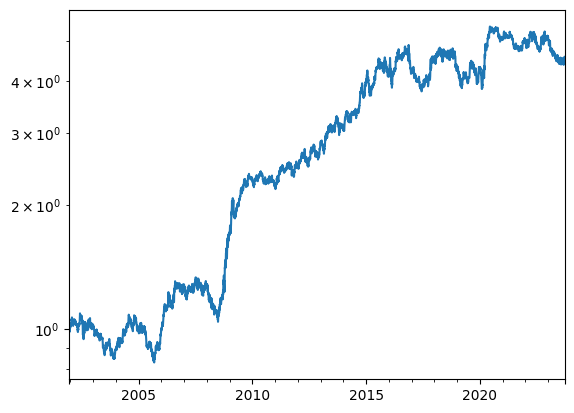

In [126]:
(results2.portfolio_value/results.portfolio_value).plot()
plt.yscale("log")

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

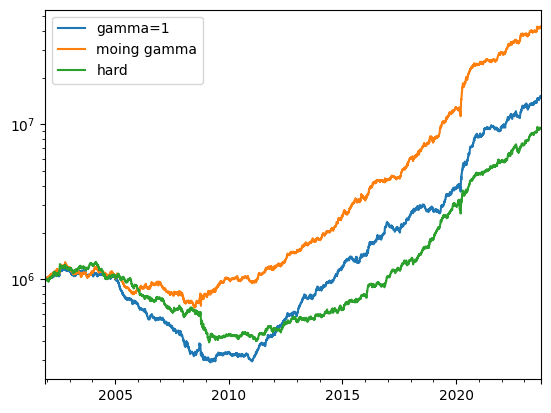

In [133]:
results3.portfolio_value.plot(label="gamma=1")
results2.portfolio_value.plot(label="moing gamma")
results.portfolio_value.plot(label="hard")
plt.legend()
plt.yscale("log")

/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/kasper/Documents/Stanford/Research/My papers/markowitz/reference_implementation/markowitz-reference/.venv/lib/python3.9/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.

<Axes: >

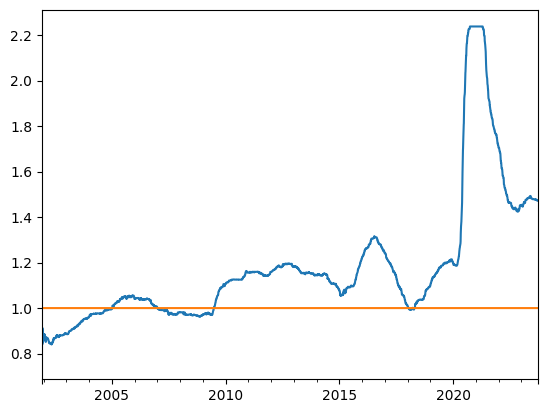

In [135]:
gamma_risks.plot()
gamma_risks3.plot()


In [122]:
(np.array(risks) <= 0.10).mean()

0.7769771528998243

In [116]:
print(f"mean: {results2.portfolio_returns.mean() * 252}")
print(f"volatility: {results2.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results2.max_drawdown}")
print(f"max leverage: {results2.max_leverage}")
print(f"sharpe: {results2.sharpe}")

mean: 0.17344025387119444
volatility: 0.12064983093961906
max drawdown: -0.49037035995050804
max leverage: 7.550241878147584
sharpe: 1.4627875923226943


In [128]:
print(f"mean: {results3.portfolio_returns.mean() * 252}")
print(f"volatility: {results3.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results3.max_drawdown}")
print(f"max leverage: {results3.max_leverage}")
print(f"sharpe: {results3.sharpe}")

mean: 0.12792709614439182
volatility: 0.12783809076710367
max drawdown: -0.756279240047702
max leverage: 7.62225670231688
sharpe: 1.0182639087089391


In [117]:
print(f"mean: {results.portfolio_returns.mean() * 252}")
print(f"volatility: {results.portfolio_returns.std() * np.sqrt(252)}")
print(f"max drawdown: {results.max_drawdown}")
print(f"max leverage: {results.max_leverage}")
print(f"sharpe: {results.sharpe}")

mean: 0.10690152368482325
volatility: 0.1249899715015102
max drawdown: -0.6974539553309929
max leverage: 7.222564873298741
sharpe: 0.8702956470609065


In [ ]:
results2

In [98]:
results.volatility

0.1271842267963638

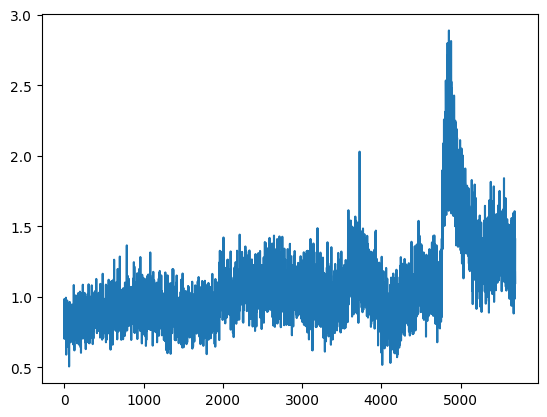

In [47]:
plt.plot(duals)